<a href="https://colab.research.google.com/github/007ekho/Optimization_techniques_RESNET_VGG_ALEXNET/blob/main/DLP_SUCCSS_AlexNet_VGG_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING PROJECT

## LEARNING RATE

#### Import necessary packages

In [ ]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!pip install torch
!pip install torchvision


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import shutil
import time
import collections
import math
import pandas as pd
import copy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached Pillow-9.5.0-cp37-cp37m-win_amd64.whl (2.5 MB)


In [ ]:
shutil.unpack_archive("C:/Users/22544561/OneDrive - MMU/success/Dataset.zip",
                      "C:/Users/22544561/OneDrive - MMU/success/Dataset")

### Data Description

In [ ]:
import os
from PIL import Image

# Define the path to your dataset
dataset_path = "C:/Users/22544561/OneDrive - MMU/success/Dataset/Dataset3"

# Size
size = sum(len(files) for _, _, files in os.walk(dataset_path))
print("Size of dataset:", size)

# Type
# Assuming all images are in JPG format
data_types = "JPG"
print("Data type of images:", data_types)

# Dimensions
dimensions = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        # Open each image using Pillow
        image_path = os.path.join(root, file)
        with Image.open(image_path) as img:
            dimensions.append(img.size)
dimensions = set(dimensions)
print("Image dimensions:", dimensions)

# Labeling
label_names = sorted(os.listdir(dataset_path))
print("Class names:", label_names)
labeling = "Labeled"
print("Labeling:", labeling)

# Balance
if labeling == "Labeled":
    class_counts = {}
    for label in label_names:
        class_counts[label] = len(os.listdir(os.path.join(dataset_path, label)))
    balance = "Balanced" if (max(class_counts.values()) / min(class_counts.values())) <= 2 else "Imbalanced"
    print("Class distribution:\n", class_counts)
    print("Balance:", balance)
else:
    print("Cannot determine balance as dataset is unlabeled.")


Size of dataset: 4041
Data type of images: JPG
Image dimensions: {(606, 875)}
Class names: ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
Labeling: Labeled
Class distribution:
 {'shirt-shortsleeve': 1347, 'sweatshirt-female': 1347, 'sweatshirt-male': 1347}
Balance: Balanced


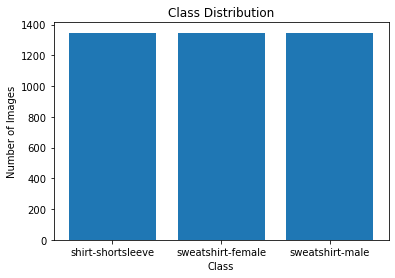

In [ ]:
import matplotlib.pyplot as plt

class_counts = {}
for label in label_names:
    class_counts[label] = len(os.listdir(os.path.join(dataset_path, label)))

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

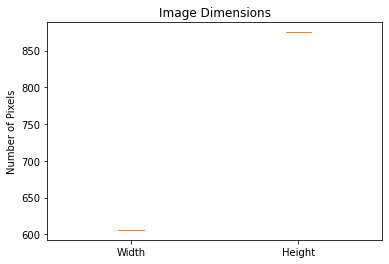

In [ ]:
import numpy as np

widths, heights = zip(*dimensions)
widths = np.array(widths)
heights = np.array(heights)

fig, ax = plt.subplots()
ax.boxplot([widths, heights])
ax.set_xticklabels(['Width', 'Height'])
ax.set_ylabel("Number of Pixels")
ax.set_title("Image Dimensions")
plt.show()

In [ ]:
import os
from PIL import Image

label_names1 = os.listdir(dataset_path)

dimensions_count = {}

for label in label_names1:
    label_path = os.path.join(dataset_path, label)
    images = os.listdir(label_path)
    for image_file in images:
        image_path = os.path.join(label_path, image_file)
        with Image.open(image_path) as img:
            dim = img.size
            if dim not in dimensions_count:
                dimensions_count[dim] = 1
            else:
                dimensions_count[dim] += 1

print("Image dimensions and number of images:")
for dim, count in dimensions_count.items():
    print(dim, ":", count)

Image dimensions and number of images:
(606, 875) : 4041


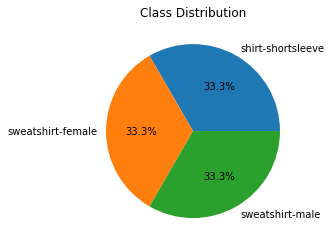

In [ ]:
if labeling == "Labeled" and balance == "Balanced":
    plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
    plt.title("Class Distribution")
    plt.show()

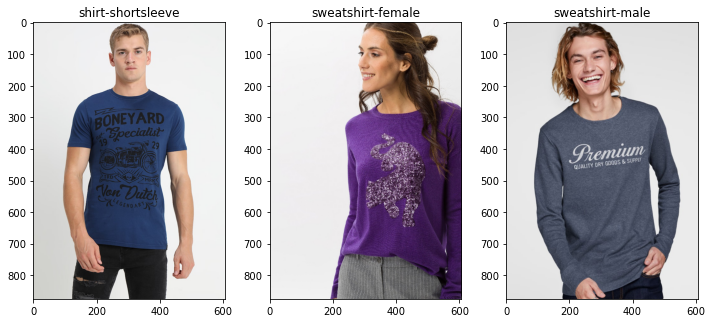

In [ ]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(10, 6))
axs = axs.ravel()

for i in range(3):
    label = label_names[i]
    img_path = os.path.join(dataset_path, label, random.choice(os.listdir(os.path.join(dataset_path, label))))
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(label)

plt.tight_layout()
plt.show()

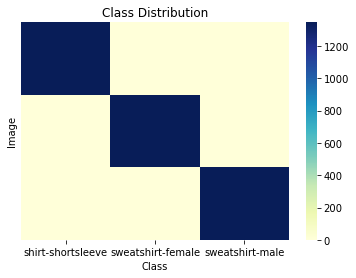

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = {}
for label in label_names:
    class_counts[label] = len(os.listdir(os.path.join(dataset_path, label)))

class_dist = []
for label in label_names:
    dist = [0] * len(label_names)
    dist[label_names.index(label)] = class_counts[label]
    class_dist.append(dist)

sns.heatmap(class_dist, xticklabels=label_names, yticklabels=False, cmap="YlGnBu")
plt.xlabel("Class")
plt.ylabel("Image")
plt.title("Class Distribution")
plt.show()

### Data Preparation

In [ ]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import splitfolders

In [ ]:
# splitting of the datasets into train,test and valid
splitfolders.ratio("C:/Users/22544561/OneDrive - MMU/success/Dataset/Dataset3",
                   output="C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data",
                   seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

Copying files: 4041 files [00:11, 359.71 files/s]


In [ ]:
#This code run through the test folder that exist within the split folder
#to extract all the images from the test folder and returning it tothe same test folder
# the catch is that  it still retains the original folders('trouser,shirt.shoe)
#but all the extracted image are subfolder('trouser,shirt,shoe) are on the same level in the main test folder
import os
import shutil

# Set the path to the input and output directory for the test folder
input_output_dir = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test"

# Create the output directory for the new test folder if it doesn't already exist
if not os.path.exists(input_output_dir):
    os.makedirs(input_output_dir)

# Loop through each class folder in the input directory for the test folder
for class_folder in os.listdir(input_output_dir):
    # Skip any files in the input directory that are not folders
    if not os.path.isdir(os.path.join(input_output_dir, class_folder)):
        continue

    # Loop through each image in the class folder and copy it to the output directory for the new test folder
    for img_file in os.listdir(os.path.join(input_output_dir, class_folder)):
        if not img_file.endswith('.jpg'):  # skip non-image files
            continue
        src_path = os.path.join(input_output_dir, class_folder, img_file)
        dst_path = os.path.join(input_output_dir, img_file)
        shutil.copyfile(src_path, dst_path)

In [ ]:
# this code creats a new subfolder "unknown"  within the test mainfolder
# moves the 3 class subfolders into the unknown subfolder
#only one subfolder "unknown" will exist within the test subfolder
#unknown folder now has 3 subfolders
import os
import shutil

source_folder = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test"
destination_folder = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test/unknown"

# Create the destination subfolder if it doesn't already exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of all files in the source folder
files = os.listdir(source_folder)

# Move each file from the source folder to the destination subfolder

for file_name in files:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    try:
        shutil.move(source_path, destination_path)
    except shutil.Error:
        print(f"Successful")
        pass


Successful


In [ ]:
folder_path = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test"

# Delete all directories except for one "unknown"
unknown_count = 0
for root, dirs, files in os.walk(folder_path, topdown=False):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        if dir == "unknown":
            unknown_count += 1
            if unknown_count > 1:
                print(f"Deleting directory {dir_path}")
                shutil.rmtree(dir_path)
        elif os.path.relpath(dir_path, folder_path) != ".":
            print(f"Deleting directory {dir_path}")
            shutil.rmtree(dir_path)

# Delete all images outside of "unknown"
image_extensions = [".jpg", ".jpeg", ".png", ".gif"]
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path) and not file.startswith("unknown") and os.path.splitext(file_path)[1] in image_extensions:
        #print(f"Deleting file {file_path}")
        os.remove(file_path)

Deleting directory C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test\unknown\shirt-shortsleeve
Deleting directory C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test\unknown\sweatshirt-female
Deleting directory C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test\unknown\sweatshirt-male


In [ ]:
#This delete the existing subfolders in the previous code
import os
import shutil

folder_path = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test"

# Delete all directories except for "unknown"
for root, dirs, files in os.walk(folder_path, topdown=False):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        if dir != "unknown" and os.path.relpath(dir_path, folder_path) != ".":
            print(f"Deleting directory {dir_path}")
            shutil.rmtree(dir_path)

# Delete all images outside of "unknown"
image_extensions = [".jpg", ".jpeg", ".png", ".gif"]
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path) and not file.startswith("unknown") and os.path.splitext(file_path)[1] in image_extensions:
        print(f"Deleting file {file_path}")
        os.remove(file_path)

In [ ]:
# Set the paths for the train and validation folders
train_path = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/train"
valid_path = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/val"

# Create a new folder to store the combined data
combined_path = "C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/train_val"
os.makedirs(combined_path, exist_ok=True)

# Copy the files from the train and validation folders to the new combined folder
for class_folder in os.listdir(train_path):
    class_path = os.path.join(train_path, class_folder)
    combined_class_path = os.path.join(combined_path, class_folder)
    os.makedirs(combined_class_path, exist_ok=True)
    for file in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file), os.path.join(combined_class_path, file))

for class_folder in os.listdir(valid_path):
    class_path = os.path.join(valid_path, class_folder)
    combined_class_path = os.path.join(combined_path, class_folder)
    os.makedirs(combined_class_path, exist_ok=True)
    for file in os.listdir(class_path):
        shutil.copy(os.path.join(class_path, file), os.path.join(combined_class_path, file))

#### Dataset Description of train, test, validation and train_validation

In [ ]:
import os

# Define the paths to your datasets
train_path = 'C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/train'
val_path = 'C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/val'
test_path = 'C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/test'
train_val_path = 'C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/train_val'

# Get the number of samples and classes in each dataset
def get_dataset_info(path):
    num_samples = 0
    classes = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
                num_samples += 1
        for dir in dirs:
            if dir not in classes:
                classes.append(dir)
    return num_samples, len(classes)

# Get the size and class distribution of each dataset
train_size, num_classes_train = get_dataset_info(train_path)
val_size, num_classes_val = get_dataset_info(val_path)
test_size, num_classes_test = get_dataset_info(test_path)
train_val_size, num_classes_train_val = get_dataset_info(train_val_path)

# Print the descriptions of each dataset
print(f'Training set size: {train_size} samples with {num_classes_train} classes')
print(f'Validation set size: {val_size} samples with {num_classes_val} classes')
print(f'Testing set size: {test_size} samples with {num_classes_test} classes')
print(f'Training and Validation set size: {train_val_size} samples with {num_classes_train_val} classes')


Training set size: 2424 samples with 3 classes
Validation set size: 807 samples with 3 classes
Testing set size: 810 samples with 1 classes
Training and Validation set size: 3231 samples with 3 classes


In [ ]:
# Get the class distribution of each dataset
def get_class_distribution(dataset_path):
    class_counts = {}
    for root, _, files in os.walk(dataset_path):
        for file in files:
            class_name = os.path.basename(root)
            if class_name not in class_counts:
                class_counts[class_name] = 0
            class_counts[class_name] += 1
    return class_counts

train_dist = get_class_distribution(train_path)
val_dist = get_class_distribution(val_path)
test_dist = get_class_distribution(test_path)
train_val_dist = get_class_distribution(train_val_path)

# Print the class distribution of each dataset
print('Class distribution of training set:')
for class_name, count in train_dist.items():
    print(f'{class_name}: {count} samples')
print()

print('Class distribution of validation set:')
for class_name, count in val_dist.items():
    print(f'{class_name}: {count} samples')
print()

print('Class distribution of testing set:')
for class_name, count in test_dist.items():
    print(f'{class_name}: {count} samples')
print()

print('Class distribution of training and validation set:')
for class_name, count in train_val_dist.items():
    print(f'{class_name}: {count} samples')
print()

Class distribution of training set:
shirt-shortsleeve: 808 samples
sweatshirt-female: 808 samples
sweatshirt-male: 808 samples

Class distribution of validation set:
shirt-shortsleeve: 269 samples
sweatshirt-female: 269 samples
sweatshirt-male: 269 samples

Class distribution of testing set:
unknown: 810 samples

Class distribution of training and validation set:
shirt-shortsleeve: 1077 samples
sweatshirt-female: 1077 samples
sweatshirt-male: 1077 samples



### DEEP LEARNING PROJECT IMPLEMENTATION

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
batch_size = 32
transform_train = transforms.Compose([
    # Randomly crop the image to obtain an image with an area of 0.08 to 1 of
    # the original area and height-to-width ratio between 3/4 and 4/3. Then,
    # scale the image to create a new 224 x 224 image
    transforms.Resize((32,32)),
    #torchvision.transforms.RandomResizedCrop(32, scale=(0.08, 1.0),
    #                                         ratio=(3.0/4.0, 4.0/3.0)),
    #torchvision.transforms.RandomHorizontalFlip(),
    # Randomly change the brightness, contrast, and saturation
    #torchvision.transforms.ColorJitter(brightness=0.4,
    #                                   contrast=0.4,
    #                                   saturation=0.4),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    # Crop a 224 x 224 square area from the center of the image
    #torchvision.transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])
   ])

In [ ]:
data_dir = 'C:/Users/22544561/OneDrive - MMU/success/Dataset/split_data/'

train_ds, train_valid_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_train) for folder in ['train', 'train_val']]

valid_ds, test_ds = [datasets.ImageFolder(
    os.path.join(data_dir, folder),
    transform=transform_test) for folder in ['val', 'test']]

In [ ]:
number_of_classes = len(train_ds.classes)
print(number_of_classes)

3


In [ ]:
train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
#This is an additional code to check the mean and standard deviation of your dataset
#- you can then use it to replace the values in transforms.Normalize to improve your work.

means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in train_ds:
    means += torch.mean(img, dim = (1,2))
    stds += torch.std(img, dim = (1,2))

means /= len(train_ds)
stds /= len(train_ds)

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Calculated means: tensor([0.8833, 0.8840, 1.0772])
Calculated stds: tensor([1.1245, 1.1897, 1.1825])


In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

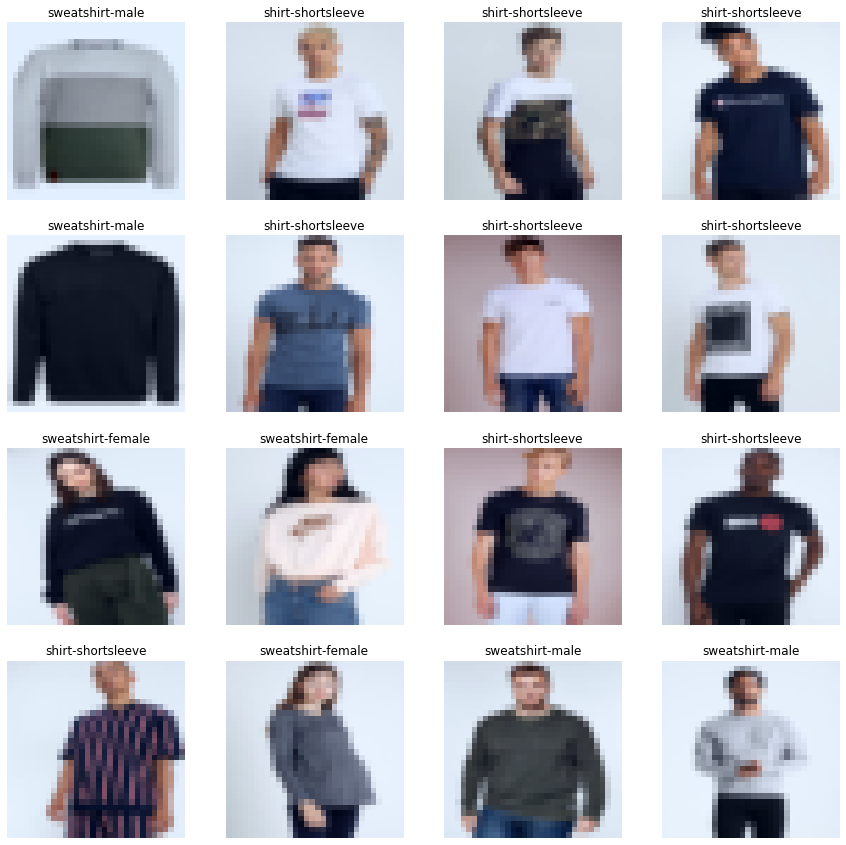

In [ ]:
N_IMAGES = 20

indices = random.sample(range(len(train_ds)), N_IMAGES)

images, labels = zip(*[train_ds[i] for i in indices])

classes = train_ds.classes

plot_images(images, labels, classes)

In [ ]:
best_models = "C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models"
os.makedirs(best_models)

# AlexNet model ADAM

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1),  # in_channels, out_channels, kernel_size, stride, padding
            nn.MaxPool2d(2),  # kernel_size
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(inplace=True)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

In [ ]:
OUTPUT_DIM = 3

model = AlexNet(OUTPUT_DIM)

def initialize_parameters(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight.data, nonlinearity='relu')
        nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data, gain=nn.init.calculate_gain('relu'))
        nn.init.constant_(m.bias.data, 0)

model.apply(initialize_parameters)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU(inplace=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

This is to display the number of trainable parameters.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 23,243,587 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

CHOSE_LR = 1e-3

optimizer = optim.Adam(model.parameters(), lr=CHOSE_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 1s
	Train Loss: 0.551 | Train Acc: 77.12%
	 Val. Loss: 0.494 |  Val. Acc: 78.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 1s
	Train Loss: 0.476 | Train Acc: 81.08%
	 Val. Loss: 0.463 |  Val. Acc: 81.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 0s
	Train Loss: 0.389 | Train Acc: 84.62%
	 Val. Loss: 0.469 |  Val. Acc: 80.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 3s
	Train Loss: 0.389 | Train Acc: 85.12%
	 Val. Loss: 0.418 |  Val. Acc: 82.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 5s
	Train Loss: 0.292 | Train Acc: 88.33%
	 Val. Loss: 0.436 |  Val. Acc: 83.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 1s
	Train Loss: 0.239 | Train Acc: 90.46%
	 Val. Loss: 0.454 |  Val. Acc: 83.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 1s
	Train Loss: 0.212 | Train Acc: 92.04%
	 Val. Loss: 0.486 |  Val. Acc: 84.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 2s
	Train Loss: 0.217 | Train Acc: 92.17%
	 Val. Loss: 0.458 |  Val. Acc: 82.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 3s
	Train Loss: 0.217 | Train Acc: 91.67%
	 Val. Loss: 0.572 |  Val. Acc: 79.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 9s
	Train Loss: 0.180 | Train Acc: 93.71%
	 Val. Loss: 0.511 |  Val. Acc: 83.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 10s
	Train Loss: 0.136 | Train Acc: 95.17%
	 Val. Loss: 0.691 |  Val. Acc: 83.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 9s
	Train Loss: 0.162 | Train Acc: 93.75%
	 Val. Loss: 0.549 |  Val. Acc: 85.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 9s
	Train Loss: 0.127 | Train Acc: 95.00%
	 Val. Loss: 0.515 |  Val. Acc: 84.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 9s
	Train Loss: 0.072 | Train Acc: 96.83%
	 Val. Loss: 0.736 |  Val. Acc: 87.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 8s
	Train Loss: 0.114 | Train Acc: 95.92%
	 Val. Loss: 0.501 |  Val. Acc: 87.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 8s
	Train Loss: 0.092 | Train Acc: 96.58%
	 Val. Loss: 0.596 |  Val. Acc: 87.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 8s
	Train Loss: 0.084 | Train Acc: 96.71%
	 Val. Loss: 0.634 |  Val. Acc: 85.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 8s
	Train Loss: 0.131 | Train Acc: 95.62%
	 Val. Loss: 0.554 |  Val. Acc: 86.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 8s
	Train Loss: 0.077 | Train Acc: 97.46%
	 Val. Loss: 0.773 |  Val. Acc: 84.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 8s
	Train Loss: 0.064 | Train Acc: 97.96%
	 Val. Loss: 0.749 |  Val. Acc: 87.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 9s
	Train Loss: 0.122 | Train Acc: 96.00%
	 Val. Loss: 0.472 |  Val. Acc: 85.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 8s
	Train Loss: 0.101 | Train Acc: 96.83%
	 Val. Loss: 0.596 |  Val. Acc: 86.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 8s
	Train Loss: 0.058 | Train Acc: 97.96%
	 Val. Loss: 0.644 |  Val. Acc: 86.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 8s
	Train Loss: 0.070 | Train Acc: 98.04%
	 Val. Loss: 0.602 |  Val. Acc: 84.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 8s
	Train Loss: 0.071 | Train Acc: 97.42%
	 Val. Loss: 0.793 |  Val. Acc: 86.00%


#### Losses and Accuracy plots.

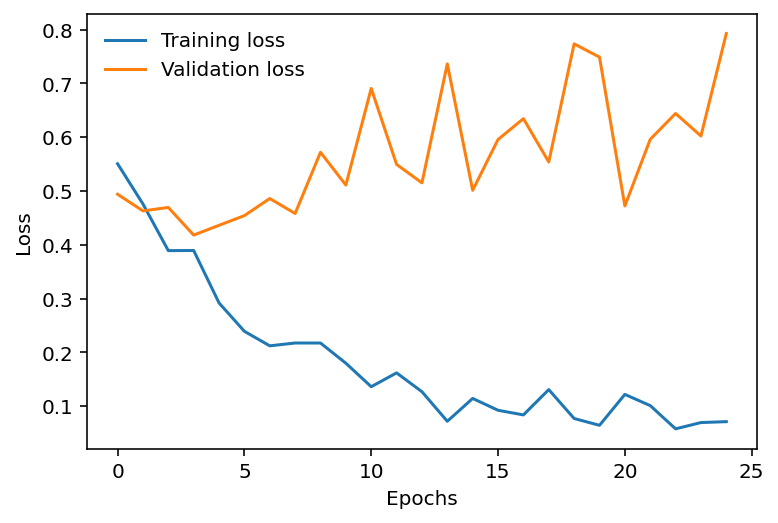

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

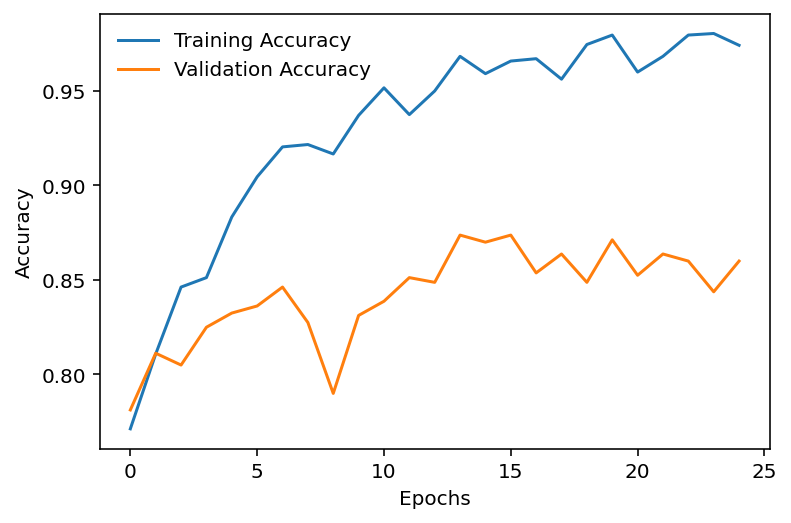

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-model.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter, device)

In [ ]:
best_models = "C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions"
os.makedirs(best_models)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_AlexNet.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_AlexNet.csv')
predicted_csv.sample(20)

,id,shirt-shortsleeve,sweatshirt-female,sweatshirt-male
78,shirt-shortsleeve (14),0.998835,3.990797e-05,0.001125
729,sweatshirt-male (63),0.043975,1.389496e-01,0.817076
160,shirt-shortsleeve (518),0.999448,1.605608e-05,0.000536
285,sweatshirt-female (1106),0.039835,4.790790e-01,0.481086
156,shirt-shortsleeve (502),0.081429,1.839374e-01,0.734634
616,sweatshirt-male (135),0.012625,3.542272e-02,0.951952
201,shirt-shortsleeve (692),0.558127,1.755977e-01,0.266275
542,sweatshirt-male (1010),0.000010,8.505808e-03,0.991484
391,sweatshirt-female (1991),0.000649,9.216984e-01,0.077653
362,sweatshirt-female (1650),0.006222,9.112993e-01,0.082478


In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

Index(['id', 'shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male'], dtype='object')

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

,id,shirt-shortsleeve,sweatshirt-female,sweatshirt-male
18,shirt-shortsleeve (1076),1,0,0
785,sweatshirt-male (899),0,0,1
134,shirt-shortsleeve (400),1,0,0
299,sweatshirt-female (1175),0,1,0
474,sweatshirt-female (50),0,1,0
607,sweatshirt-male (1303),0,0,1
719,sweatshirt-male (583),0,0,1
375,sweatshirt-female (1785),0,1,0
548,sweatshirt-male (103),0,0,1
642,sweatshirt-male (251),0,0,1


In [ ]:
ground_truth = "C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth"
os.makedirs(ground_truth)

In [ ]:
Ground_truth.to_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

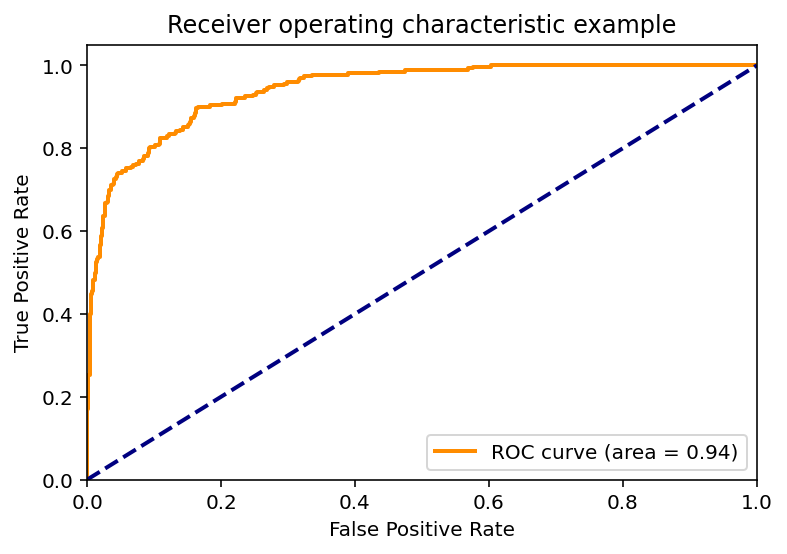

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


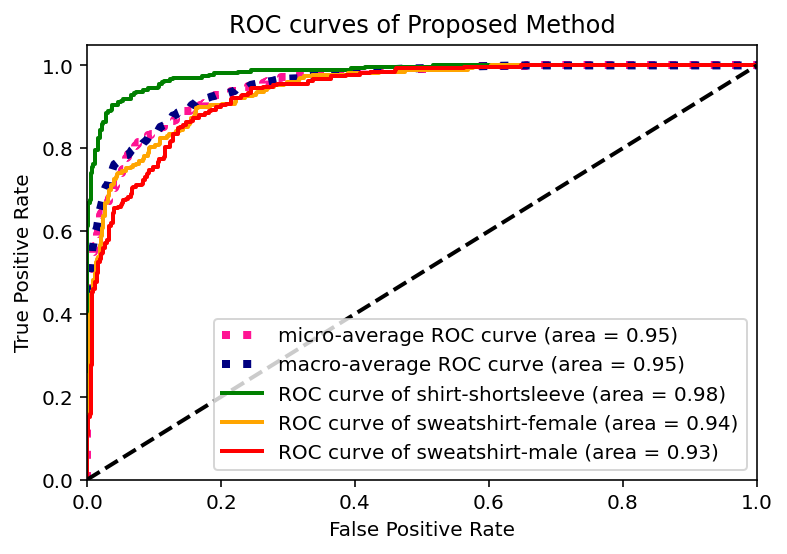

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

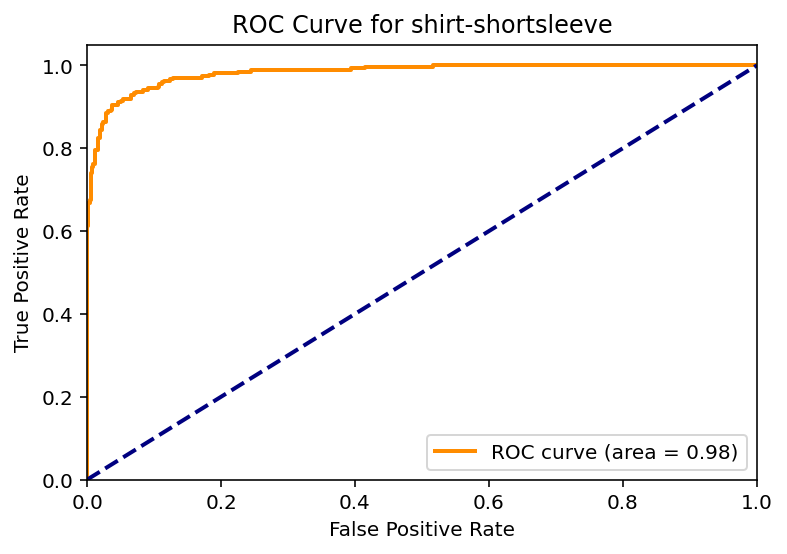

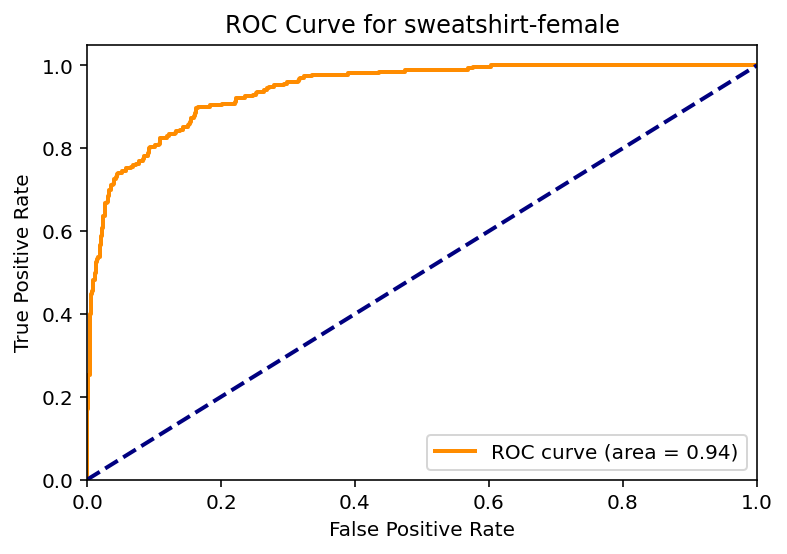

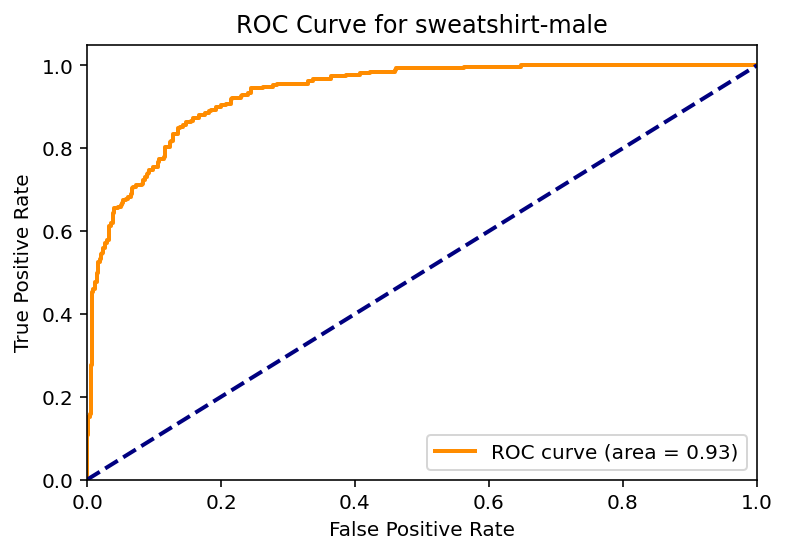

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
pred_class

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
        0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
        2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
class_counts = np.unique(pred_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([240, 221, 349], dtype=int64))

In [ ]:
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[228   8  34]
 [  3 197  70]
 [  9  16 245]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


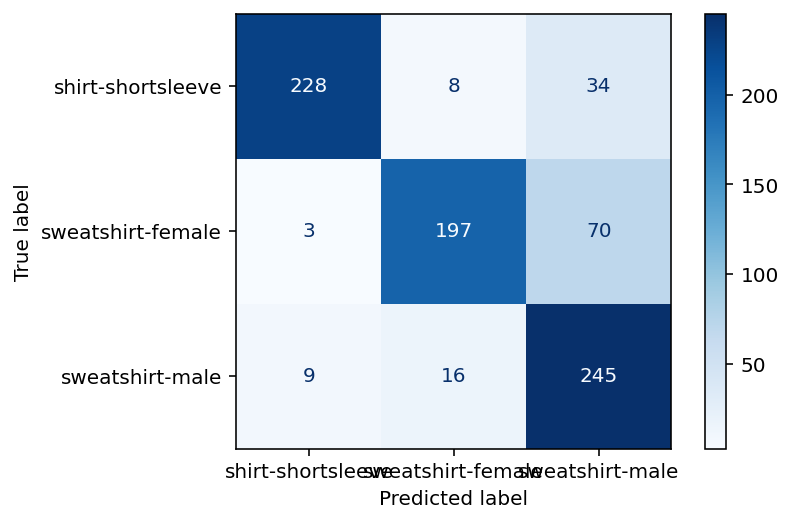

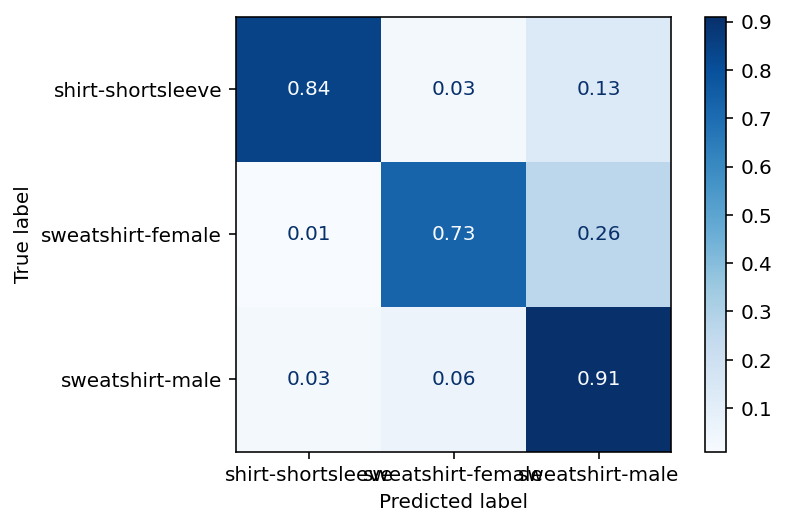

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
checker = pd.read_csv('predictions/AlexNet/prediction_AlexNet.csv')
checker.sample(30)

,id,shirt-shortsleeve,sweatshirt-female,sweatshirt-male
192,shirt-shortsleeve (637),9.999664e-01,3.610062e-07,3.328997e-05
202,shirt-shortsleeve (693),9.999992e-01,1.392907e-08,8.878056e-07
488,sweatshirt-female (640),1.001300e-02,9.467959e-01,4.319114e-02
730,sweatshirt-male (635),3.667299e-02,6.784888e-02,8.954781e-01
683,sweatshirt-male (447),3.836058e-07,3.506395e-04,9.996489e-01
26,shirt-shortsleeve (1098),9.998932e-01,8.898370e-06,9.785635e-05
417,sweatshirt-female (2162),3.573377e-01,5.497494e-01,9.291285e-02
306,sweatshirt-female (1214),1.854116e-04,9.475340e-01,5.228058e-02
347,sweatshirt-female (1573),9.122387e-01,3.392351e-02,5.383781e-02
114,shirt-shortsleeve (314),9.978163e-01,2.812676e-04,1.902382e-03


In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

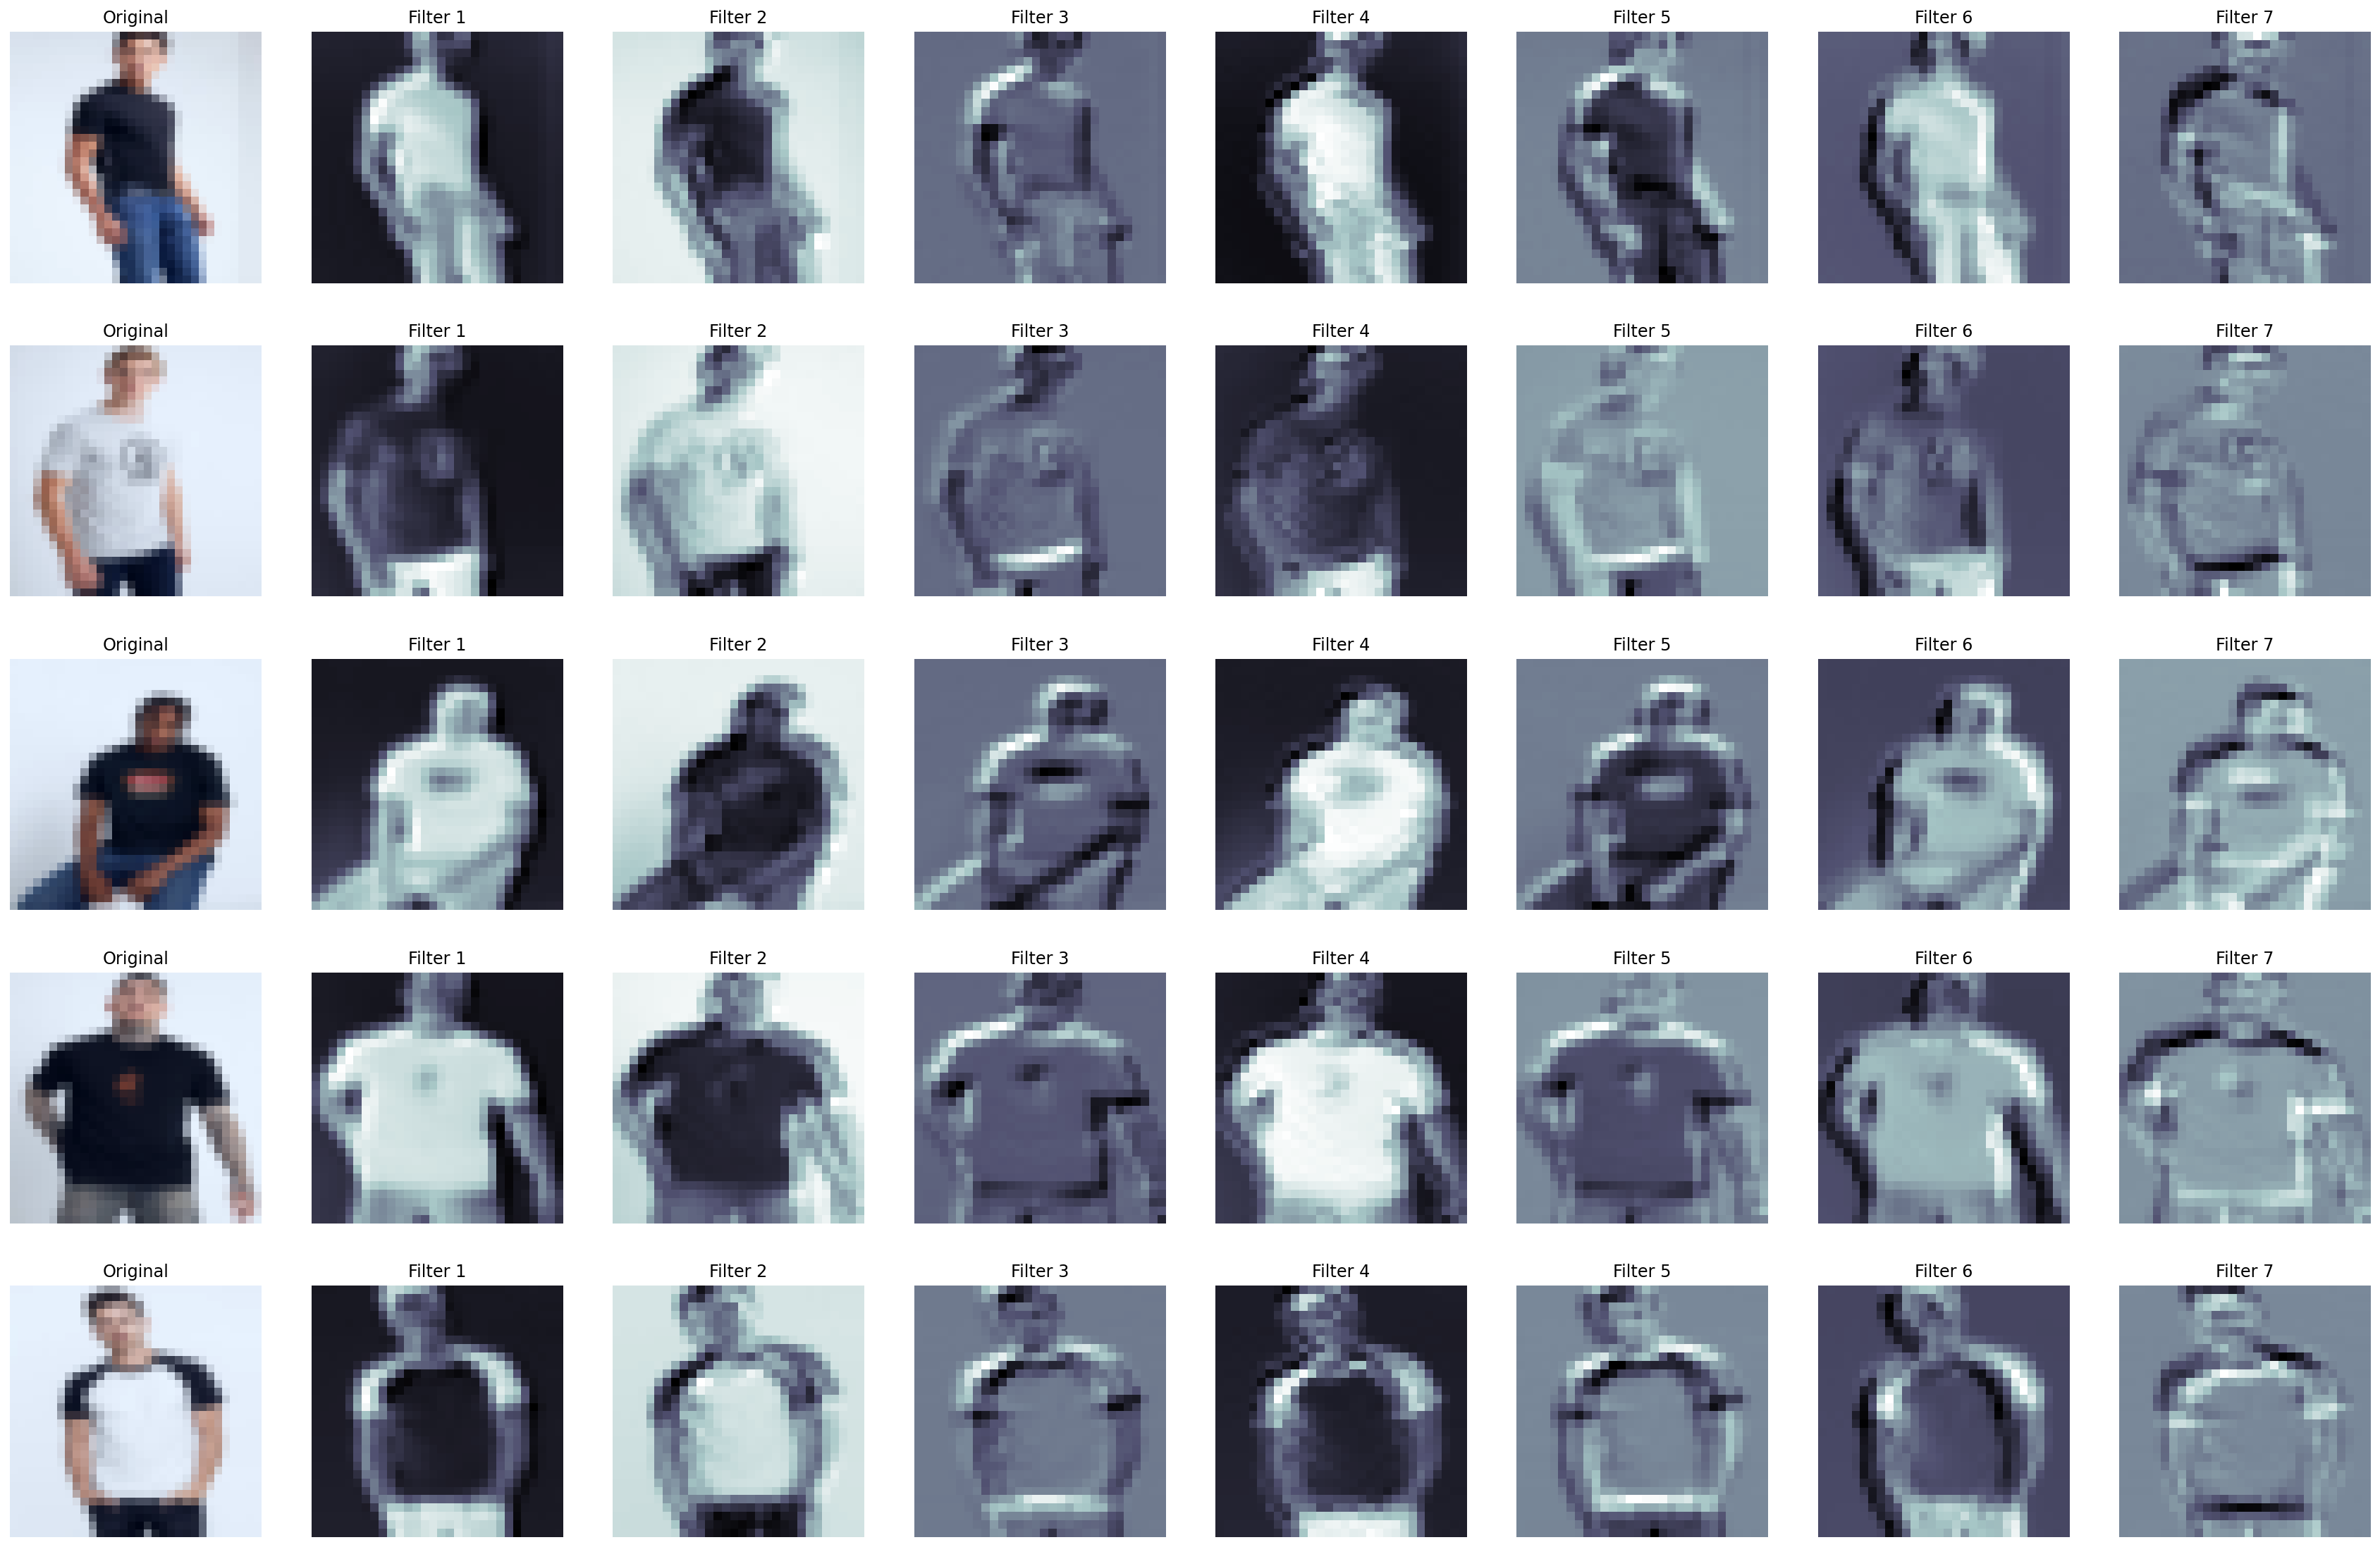

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

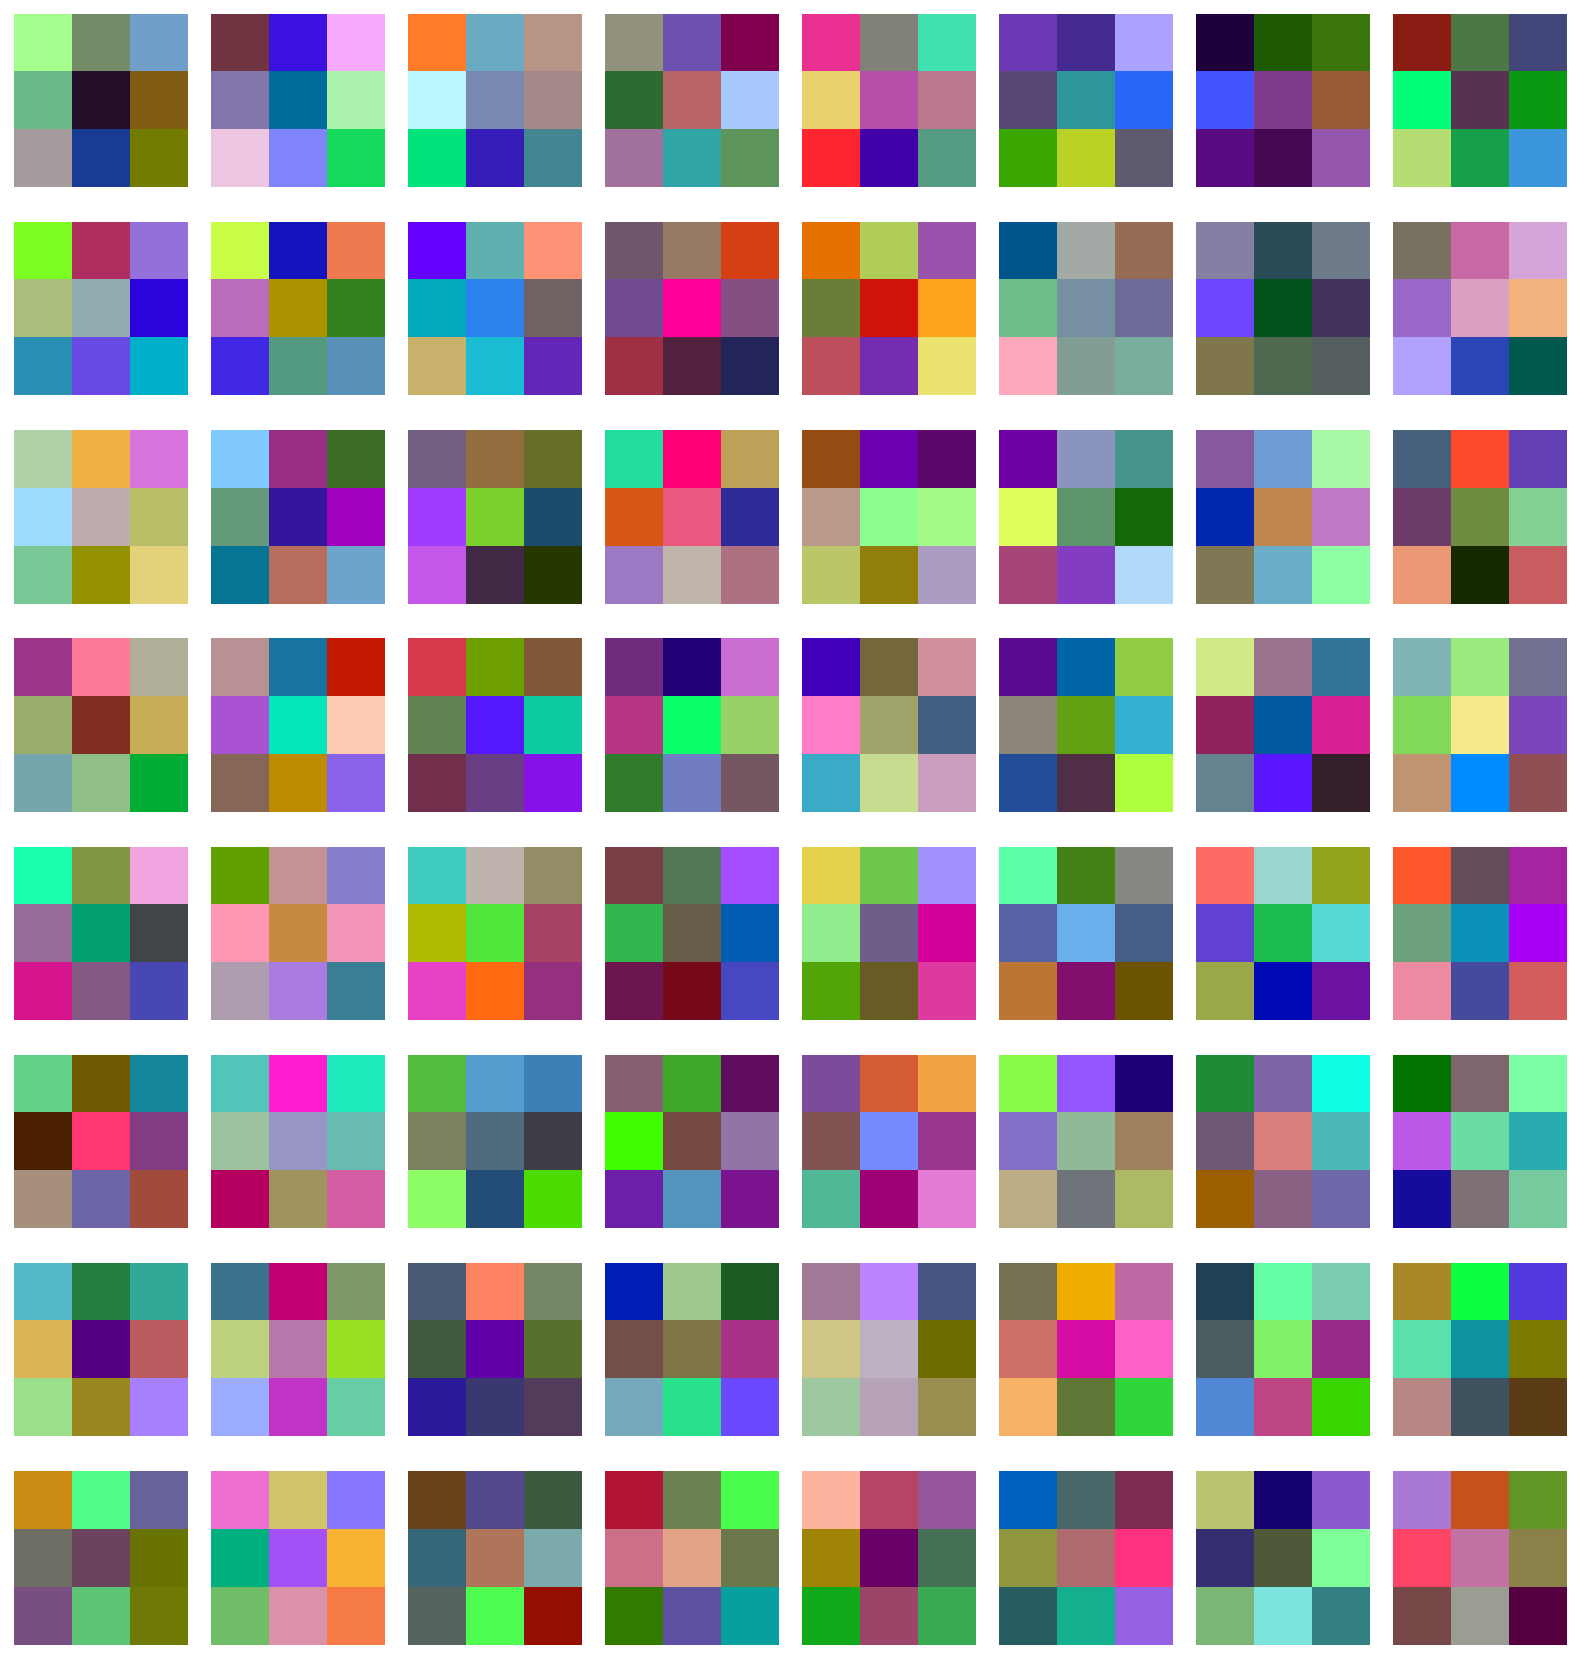

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.95      0.84      0.89       270
sweatshirt-female       0.89      0.73      0.80       270
  sweatshirt-male       0.70      0.91      0.79       270

         accuracy                           0.83       810
        macro avg       0.85      0.83      0.83       810
     weighted avg       0.85      0.83      0.83       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.8271604938271605


# ALEXNET SGD

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

CHOSE_LR = 1e-3

optimizer = optim.SGD(model.parameters(), lr=CHOSE_LR)

def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-ALEXSGD-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 24s
	Train Loss: 1.217 | Train Acc: 35.88%
	 Val. Loss: 1.135 |  Val. Acc: 37.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 31s
	Train Loss: 1.119 | Train Acc: 38.50%
	 Val. Loss: 1.112 |  Val. Acc: 38.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 30s
	Train Loss: 1.108 | Train Acc: 38.54%
	 Val. Loss: 1.102 |  Val. Acc: 38.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 30s
	Train Loss: 1.094 | Train Acc: 39.54%
	 Val. Loss: 1.093 |  Val. Acc: 37.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 30s
	Train Loss: 1.083 | Train Acc: 41.00%
	 Val. Loss: 1.088 |  Val. Acc: 37.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 30s
	Train Loss: 1.090 | Train Acc: 39.79%
	 Val. Loss: 1.085 |  Val. Acc: 38.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 30s
	Train Loss: 1.077 | Train Acc: 40.12%
	 Val. Loss: 1.080 |  Val. Acc: 37.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 30s
	Train Loss: 1.074 | Train Acc: 40.58%
	 Val. Loss: 1.078 |  Val. Acc: 37.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 30s
	Train Loss: 1.071 | Train Acc: 40.21%
	 Val. Loss: 1.075 |  Val. Acc: 37.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 30s
	Train Loss: 1.072 | Train Acc: 41.33%
	 Val. Loss: 1.070 |  Val. Acc: 37.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 30s
	Train Loss: 1.060 | Train Acc: 41.25%
	 Val. Loss: 1.067 |  Val. Acc: 37.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 31s
	Train Loss: 1.058 | Train Acc: 40.42%
	 Val. Loss: 1.066 |  Val. Acc: 37.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 30s
	Train Loss: 1.063 | Train Acc: 40.17%
	 Val. Loss: 1.068 |  Val. Acc: 36.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 29s
	Train Loss: 1.061 | Train Acc: 40.58%
	 Val. Loss: 1.068 |  Val. Acc: 37.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 29s
	Train Loss: 1.061 | Train Acc: 40.04%
	 Val. Loss: 1.061 |  Val. Acc: 37.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 30s
	Train Loss: 1.060 | Train Acc: 40.96%
	 Val. Loss: 1.064 |  Val. Acc: 36.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 29s
	Train Loss: 1.056 | Train Acc: 42.00%
	 Val. Loss: 1.066 |  Val. Acc: 36.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 29s
	Train Loss: 1.057 | Train Acc: 40.00%
	 Val. Loss: 1.062 |  Val. Acc: 37.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 29s
	Train Loss: 1.053 | Train Acc: 42.33%
	 Val. Loss: 1.062 |  Val. Acc: 37.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 29s
	Train Loss: 1.052 | Train Acc: 41.21%
	 Val. Loss: 1.058 |  Val. Acc: 38.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 29s
	Train Loss: 1.053 | Train Acc: 40.67%
	 Val. Loss: 1.059 |  Val. Acc: 36.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 29s
	Train Loss: 1.058 | Train Acc: 40.71%
	 Val. Loss: 1.058 |  Val. Acc: 37.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 30s
	Train Loss: 1.056 | Train Acc: 43.21%
	 Val. Loss: 1.058 |  Val. Acc: 37.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 30s
	Train Loss: 1.050 | Train Acc: 43.42%
	 Val. Loss: 1.057 |  Val. Acc: 41.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 23s
	Train Loss: 1.043 | Train Acc: 43.12%
	 Val. Loss: 1.058 |  Val. Acc: 41.38%


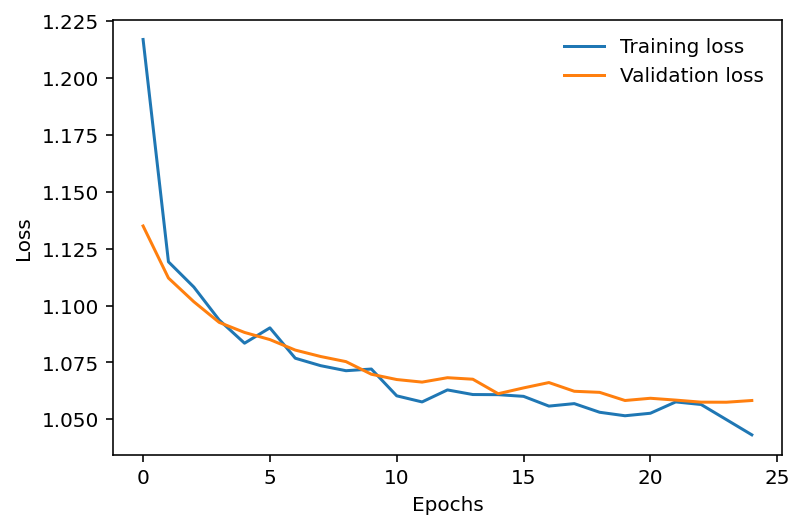

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

810

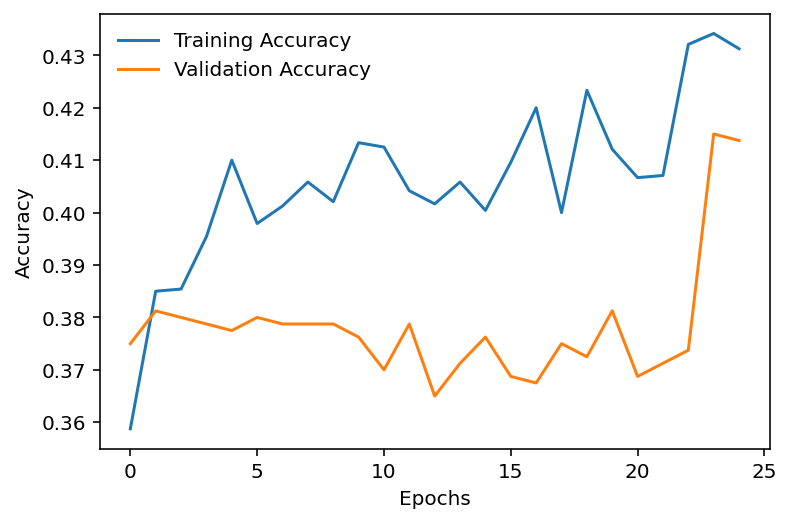

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

#Loading the best model

model.load_state_dict(torch.load('C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-ALEXSGD-model.pt'))

images, labels, probs = get_predictions(model, test_iter, device)

# best_models = "C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions"
# os.makedirs(best_models)

#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_AlexNet_SGD.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

predicted_csv=pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_AlexNet_SGD.csv')
predicted_csv.sample(20)

def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

predicted_csv.columns

columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

Ground_truth.sample(20)



Ground_truth.to_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth_ALEXSGD.csv',
                    index=False
                   )

test = pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth_ALEXSGD.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

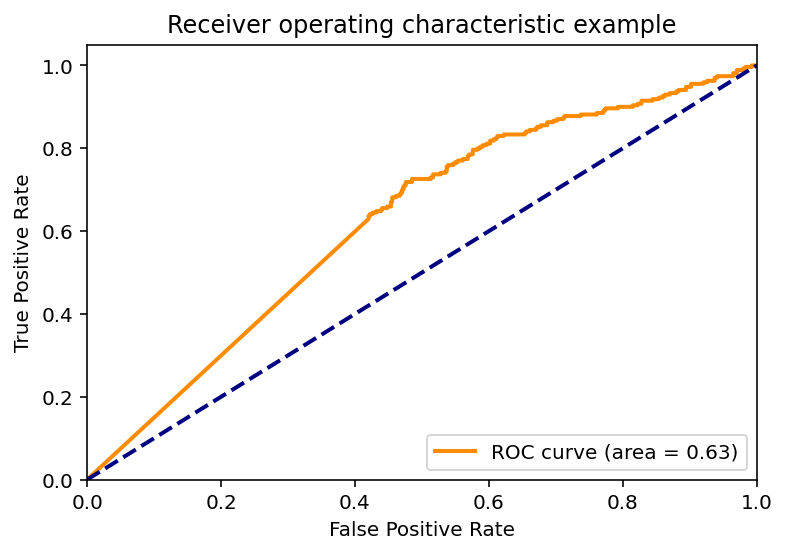

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


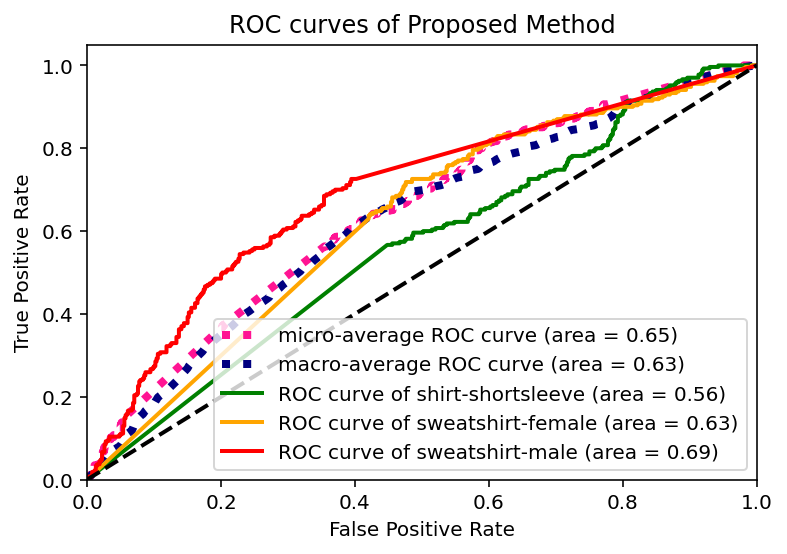

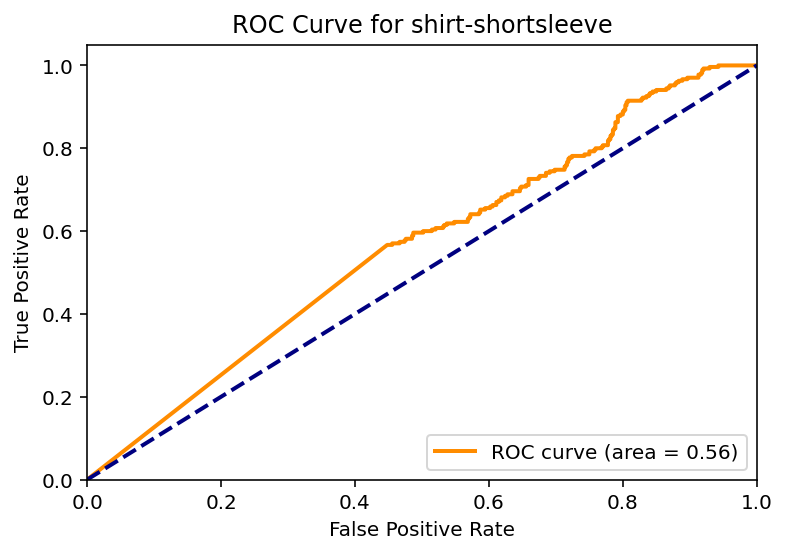

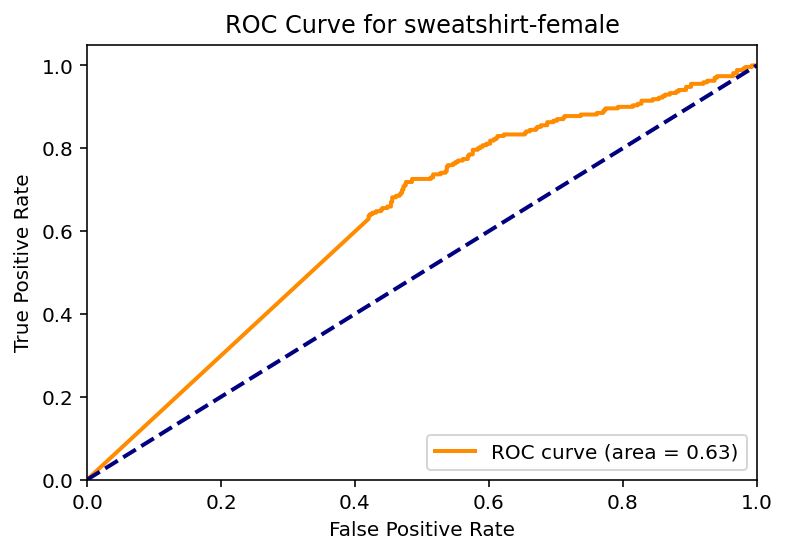

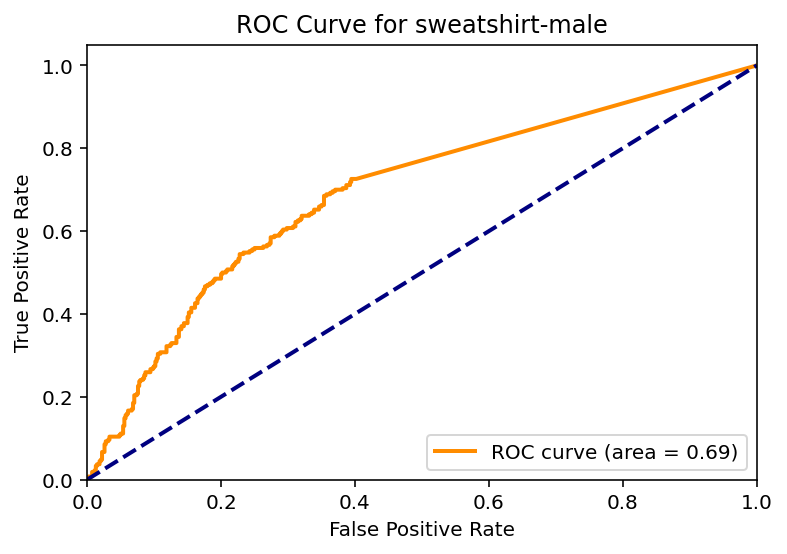

[[  0 172  98]
 [  3 189  78]
 [  0  98 172]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]
Object `shortsleeves` not found.


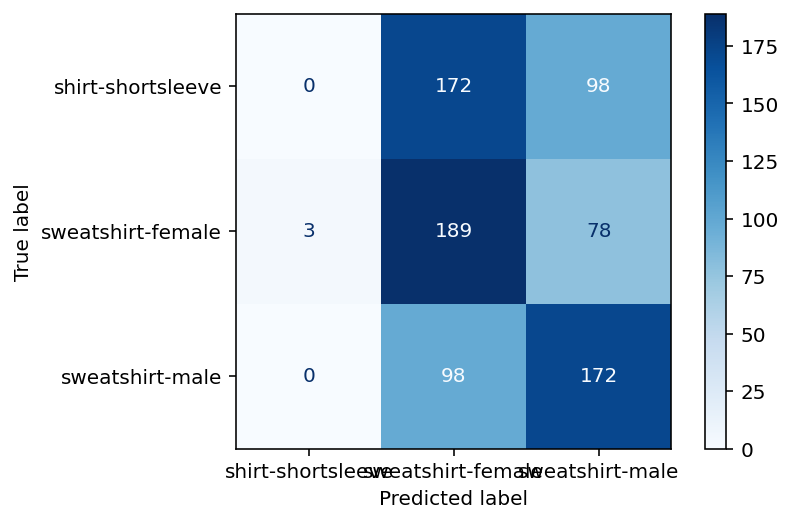

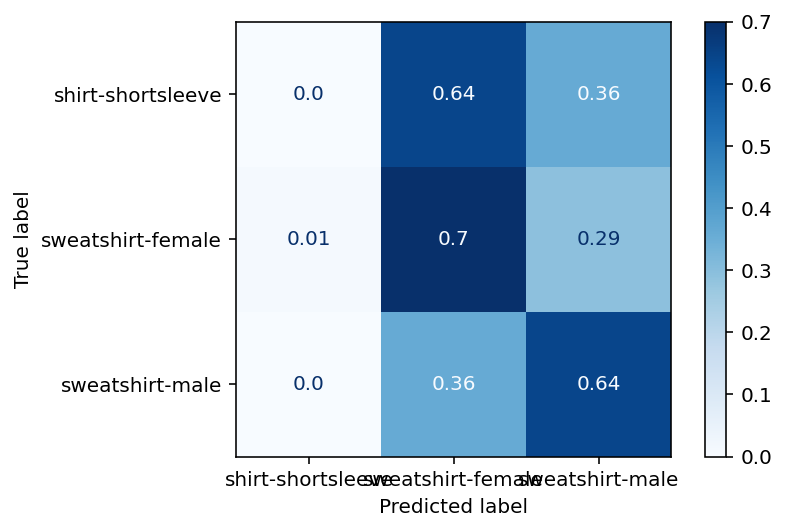

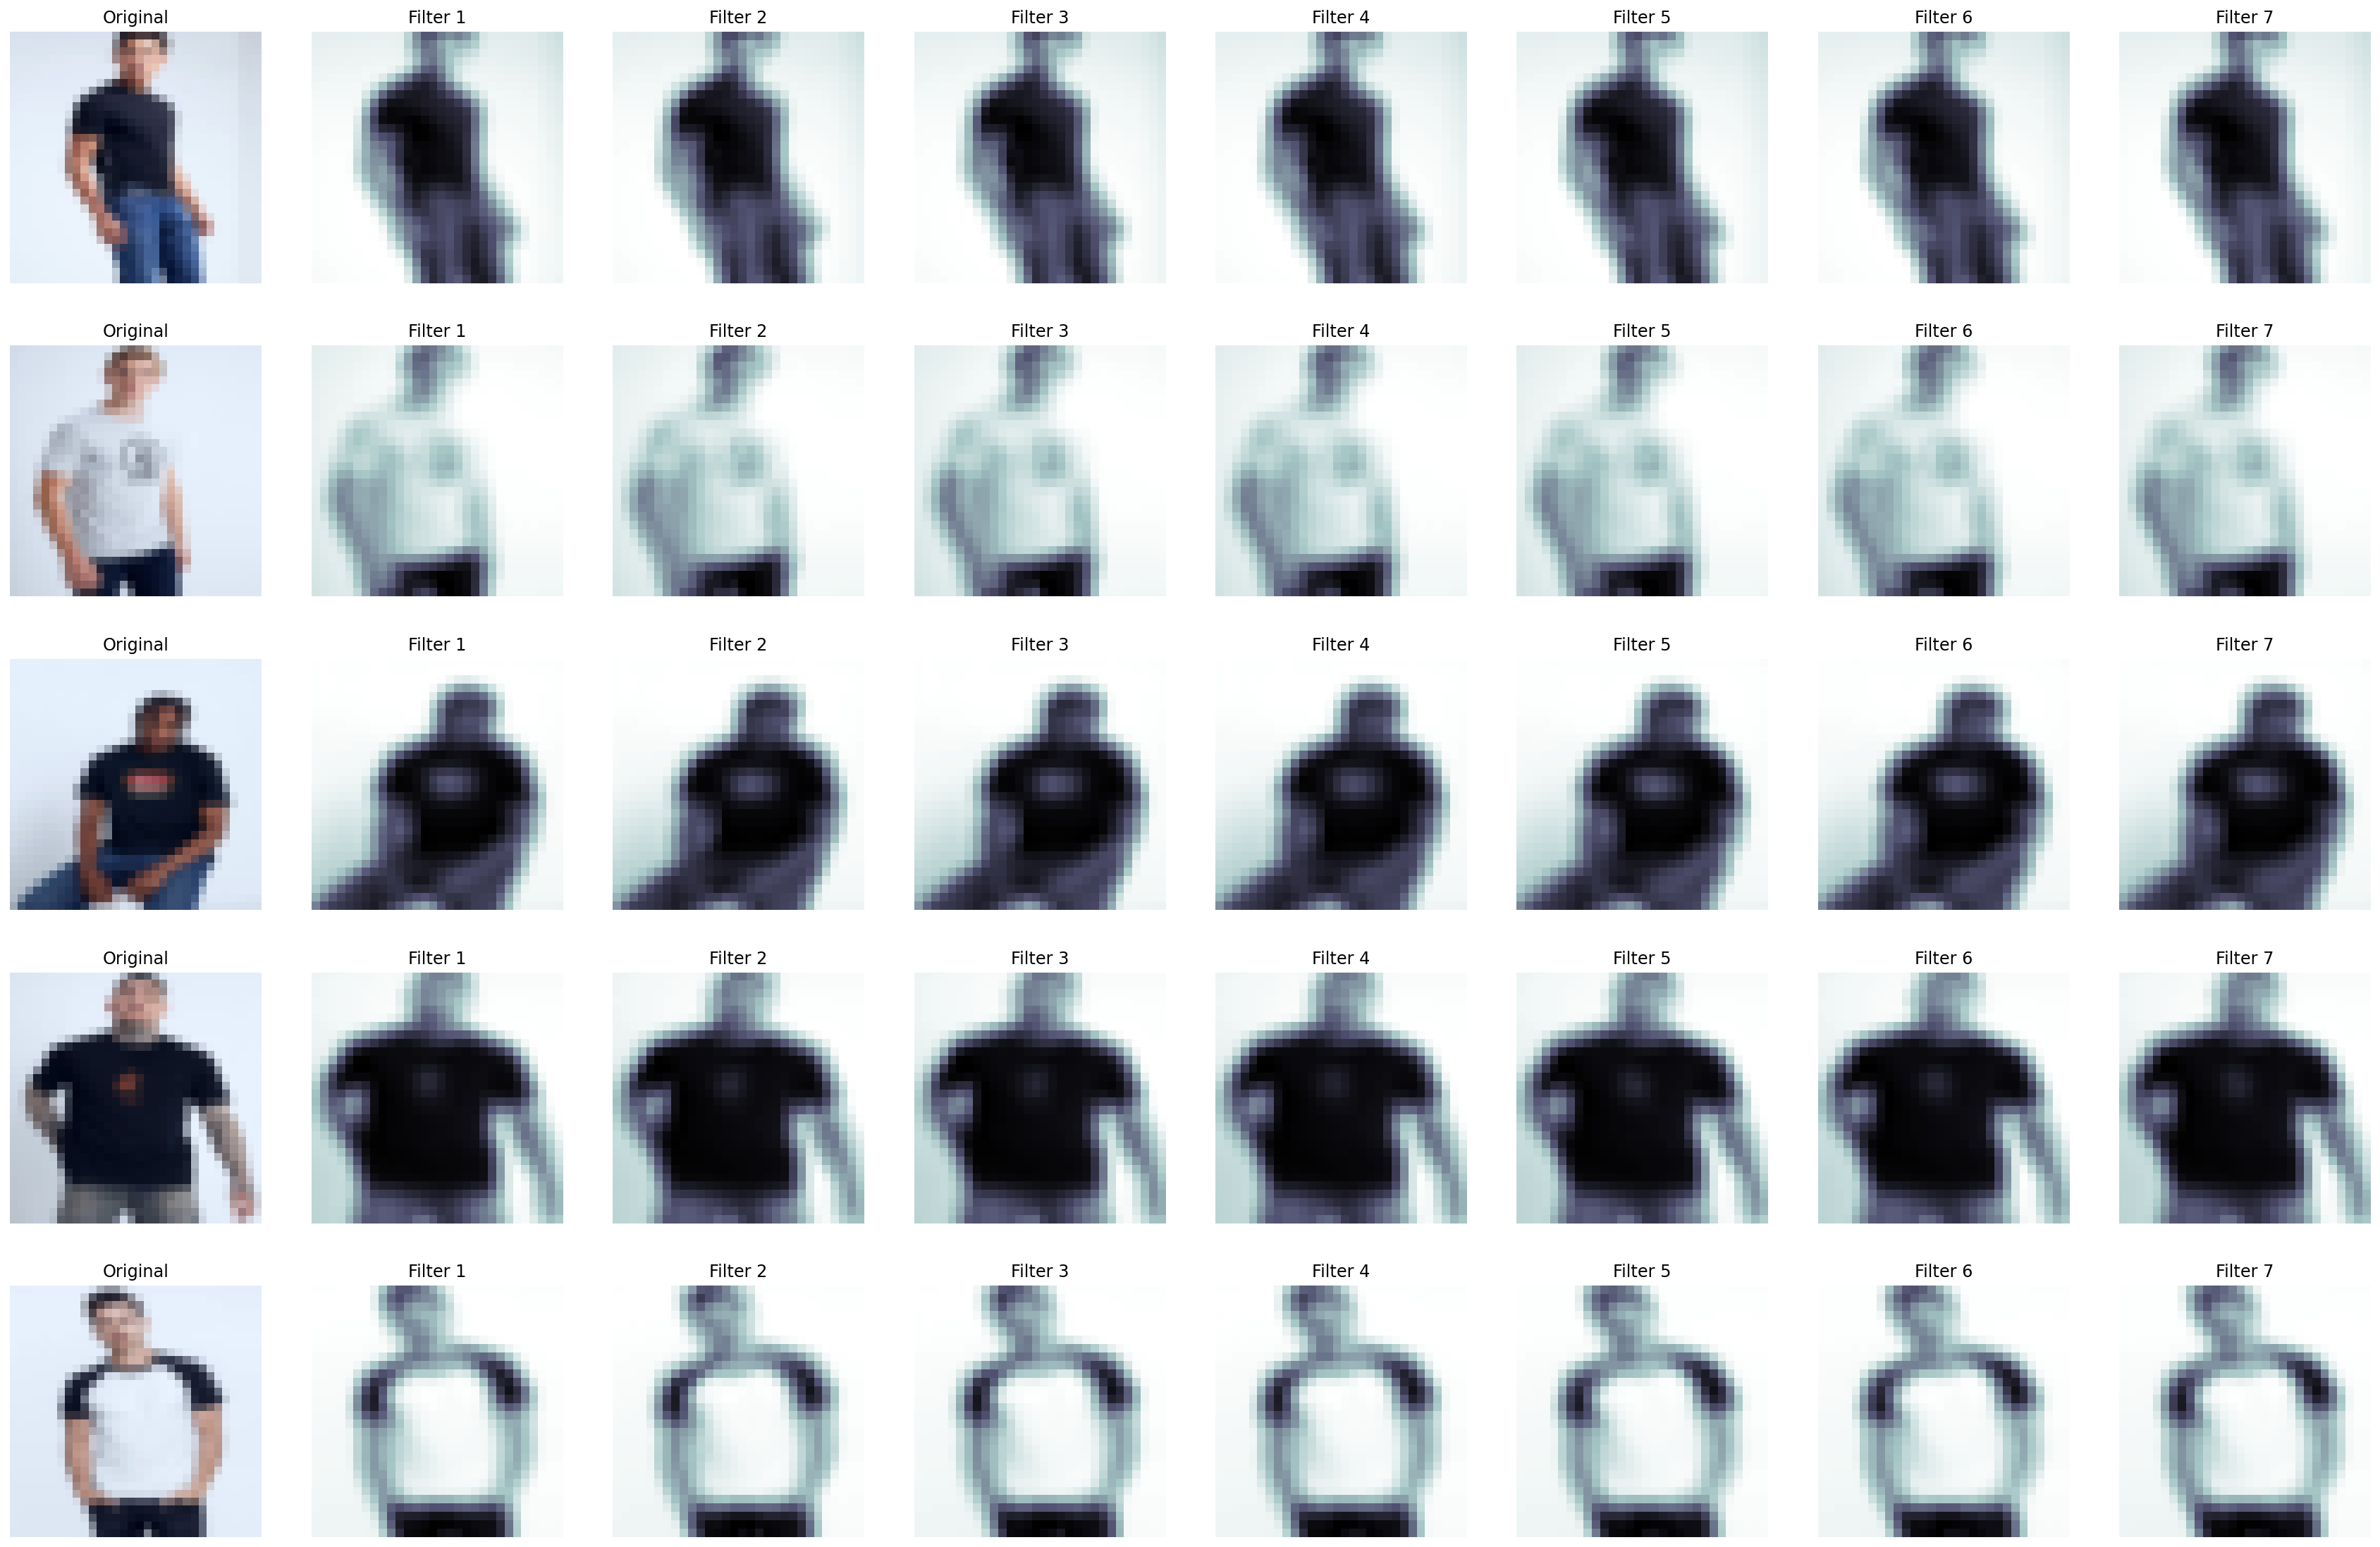

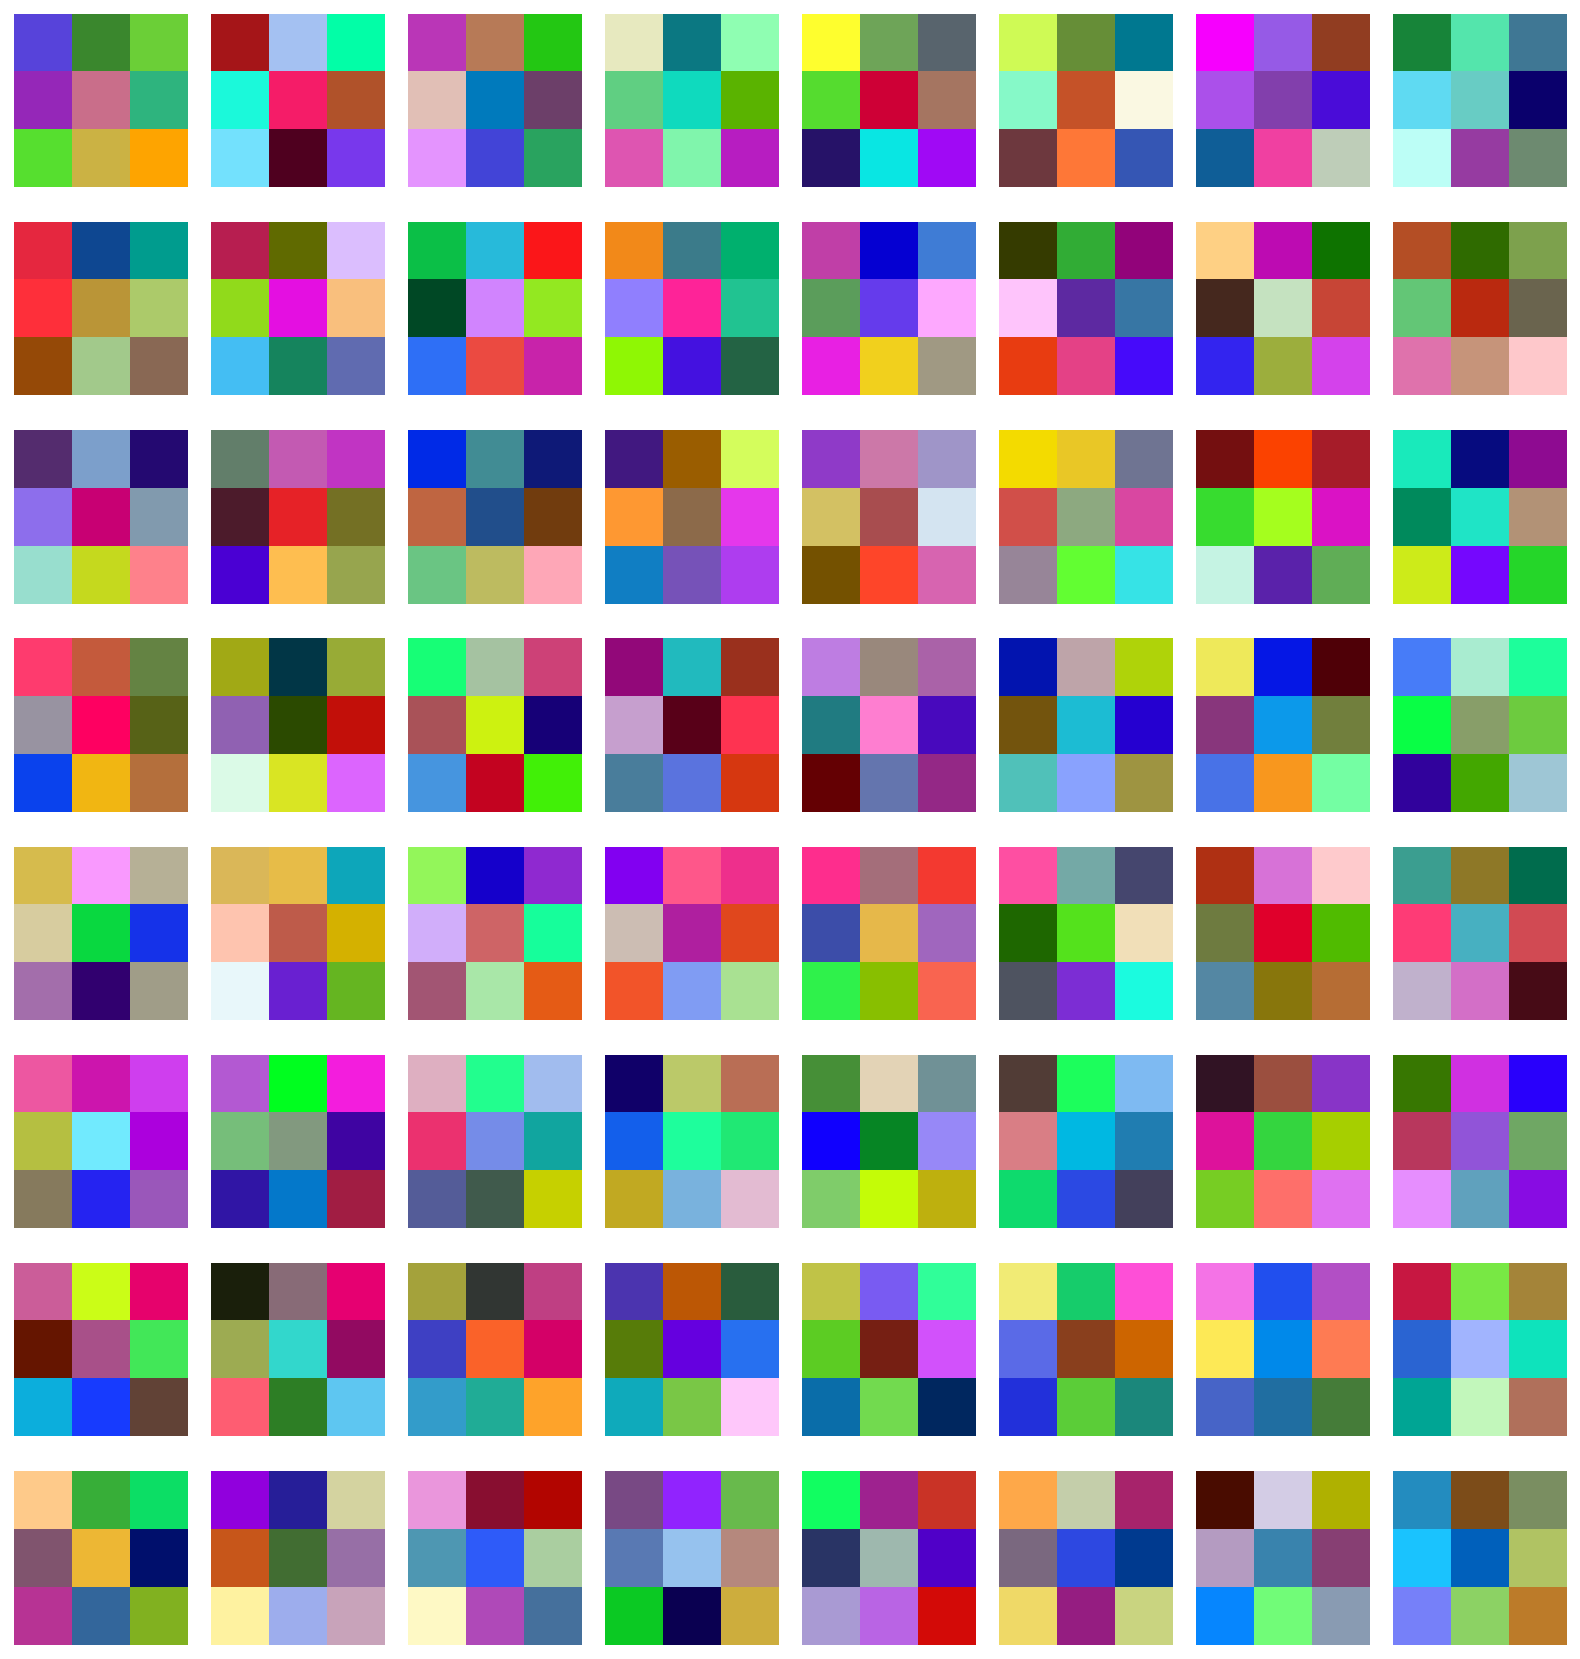

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

pred_class

class_counts = np.unique(pred_class, return_counts=True)
class_counts

true_class

class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

# checker = pd.read_csv('predictions/AlexNet/prediction_AlexNet.csv')
# checker.sample(30)

def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

plot_filters(filters)



In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

print(accuracy)

                   precision    recall  f1-score   support

shirt-shortsleeve       0.00      0.00      0.00       270
sweatshirt-female       0.41      0.70      0.52       270
  sweatshirt-male       0.49      0.64      0.56       270

         accuracy                           0.45       810
        macro avg       0.30      0.45      0.36       810
     weighted avg       0.30      0.45      0.36       810

0.445679012345679


# VGG SGD

# VGG 11 ADAM 1e-3

In [ ]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

HERE you can start to define your model, you can use different vgg for your work. Change the OUTPUT_DIM to the number of classes.

In [ ]:
vgg11_layers = get_vgg_layers(vgg11_config, batch_norm=True)
#print(vgg11_layers)

OUTPUT_DIM = 3

model = VGG(vgg11_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg11_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

C:\Users\22544561\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\22544561\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to C:\Users\22544561/.cache\torch\hub\checkpoints\vgg11_bn-6002323d.pth
4.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the clie

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

#params = [
#          {'params': model.features.parameters(), 'lr': FOUND_LR / 10},
#          {'params': model.classifier.parameters()}
#         ]

optimizer = optim.Adam(model.parameters(), lr=FOUND_LR)
#optimizer = optim.Adam(params, lr=FOUND_LR)
#optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-VGGADAM_model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 49s
	Train Loss: 7.212 | Train Acc: 36.88%
	 Val. Loss: 1.082 |  Val. Acc: 38.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 48s
	Train Loss: 1.108 | Train Acc: 38.71%
	 Val. Loss: 1.062 |  Val. Acc: 42.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 48s
	Train Loss: 1.076 | Train Acc: 41.58%
	 Val. Loss: 1.064 |  Val. Acc: 41.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 55s
	Train Loss: 1.064 | Train Acc: 43.25%
	 Val. Loss: 1.117 |  Val. Acc: 38.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 58s
	Train Loss: 1.048 | Train Acc: 42.71%
	 Val. Loss: 1.050 |  Val. Acc: 39.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 57s
	Train Loss: 1.041 | Train Acc: 43.92%
	 Val. Loss: 1.005 |  Val. Acc: 47.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 59s
	Train Loss: 1.014 | Train Acc: 47.17%
	 Val. Loss: 0.985 |  Val. Acc: 49.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 59s
	Train Loss: 1.022 | Train Acc: 48.88%
	 Val. Loss: 1.070 |  Val. Acc: 38.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 59s
	Train Loss: 1.037 | Train Acc: 46.58%
	 Val. Loss: 1.084 |  Val. Acc: 38.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 2m 31s
	Train Loss: 1.010 | Train Acc: 48.29%
	 Val. Loss: 1.051 |  Val. Acc: 41.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 2m 43s
	Train Loss: 1.003 | Train Acc: 49.46%
	 Val. Loss: 0.974 |  Val. Acc: 49.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 2m 38s
	Train Loss: 0.956 | Train Acc: 51.08%
	 Val. Loss: 1.009 |  Val. Acc: 41.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 2m 30s
	Train Loss: 0.982 | Train Acc: 50.79%
	 Val. Loss: 1.129 |  Val. Acc: 35.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 2m 33s
	Train Loss: 0.980 | Train Acc: 51.08%
	 Val. Loss: 0.901 |  Val. Acc: 57.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 2m 32s
	Train Loss: 0.961 | Train Acc: 52.50%
	 Val. Loss: 0.968 |  Val. Acc: 52.00%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 2m 28s
	Train Loss: 1.027 | Train Acc: 46.38%
	 Val. Loss: 0.975 |  Val. Acc: 51.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 2m 33s
	Train Loss: 1.001 | Train Acc: 50.00%
	 Val. Loss: 1.015 |  Val. Acc: 47.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 2m 40s
	Train Loss: 0.947 | Train Acc: 53.58%
	 Val. Loss: 0.974 |  Val. Acc: 51.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 2m 39s
	Train Loss: 0.946 | Train Acc: 53.71%
	 Val. Loss: 0.923 |  Val. Acc: 53.87%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 2m 40s
	Train Loss: 0.940 | Train Acc: 54.00%
	 Val. Loss: 0.945 |  Val. Acc: 51.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 2m 39s
	Train Loss: 0.932 | Train Acc: 54.71%
	 Val. Loss: 0.983 |  Val. Acc: 51.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 2m 39s
	Train Loss: 0.956 | Train Acc: 55.21%
	 Val. Loss: 0.894 |  Val. Acc: 57.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 2m 40s
	Train Loss: 0.932 | Train Acc: 57.50%
	 Val. Loss: 0.810 |  Val. Acc: 64.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 2m 40s
	Train Loss: 1.041 | Train Acc: 47.83%
	 Val. Loss: 1.052 |  Val. Acc: 40.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 2m 39s
	Train Loss: 1.031 | Train Acc: 46.42%
	 Val. Loss: 0.910 |  Val. Acc: 56.00%


#### Losses and Accuracy VGG lr 1e-5 plots.

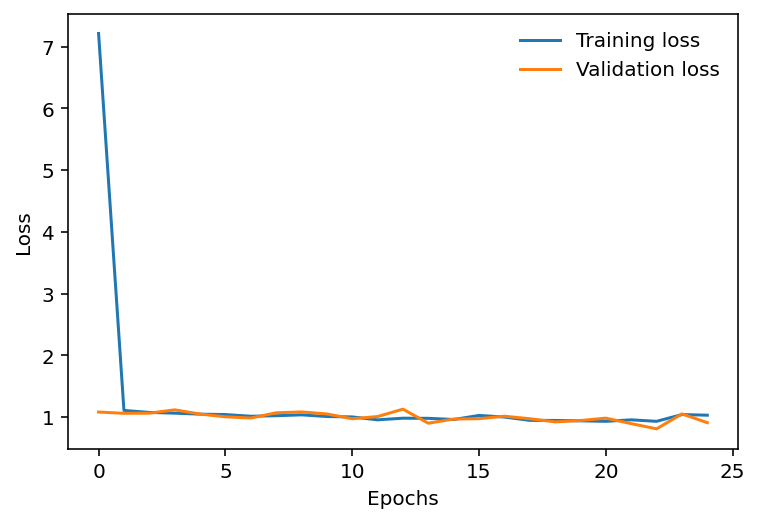

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

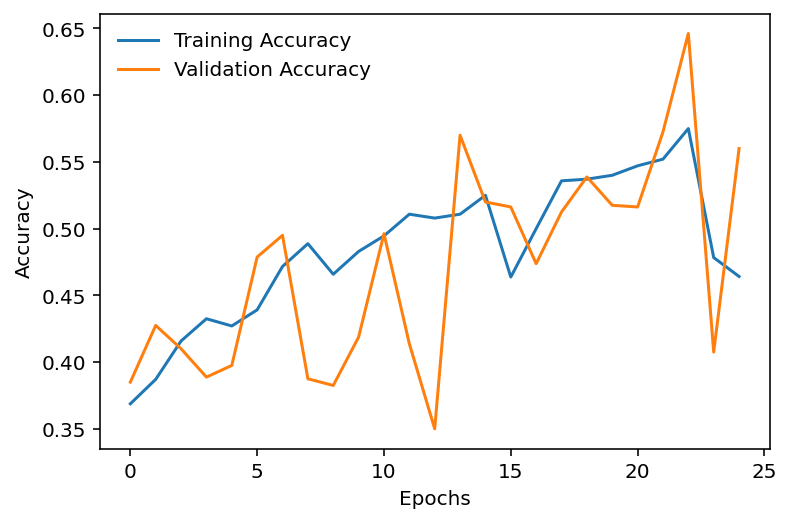

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-VGGADAM_model.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
ground_truth = "C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-VGGADAM_model.pt"
os.makedirs(ground_truth)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_VGG_ADAM.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_VGG_ADAM.csv')
predicted_csv.sample(20)

,id,shirt-shortsleeve,sweatshirt-female,sweatshirt-male
192,shirt-shortsleeve (637),0.560672,0.288656,0.150671
202,shirt-shortsleeve (693),0.560672,0.288656,0.150671
488,sweatshirt-female (640),0.560672,0.288656,0.150671
730,sweatshirt-male (635),0.019496,0.483940,0.496564
683,sweatshirt-male (447),0.001056,0.400142,0.598801
26,shirt-shortsleeve (1098),0.560672,0.288656,0.150671
417,sweatshirt-female (2162),0.560672,0.288656,0.150671
306,sweatshirt-female (1214),0.045157,0.476973,0.477870
347,sweatshirt-female (1573),0.560672,0.288656,0.150671
114,shirt-shortsleeve (314),0.560672,0.288656,0.150671


In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

Index(['id', 'shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male'], dtype='object')

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

,id,shirt-shortsleeve,sweatshirt-female,sweatshirt-male
277,sweatshirt-female (1048),0,1,0
548,sweatshirt-male (103),0,0,1
440,sweatshirt-female (2359),0,1,0
219,shirt-shortsleeve (792),1,0,0
510,sweatshirt-female (793),0,1,0
435,sweatshirt-female (2329),0,1,0
424,sweatshirt-female (2243),0,1,0
674,sweatshirt-male (400),0,0,1
348,sweatshirt-female (1574),0,1,0
670,sweatshirt-male (379),0,0,1


In [ ]:
Ground_truth.to_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth_VGGADAM.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth_VGGADAM.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

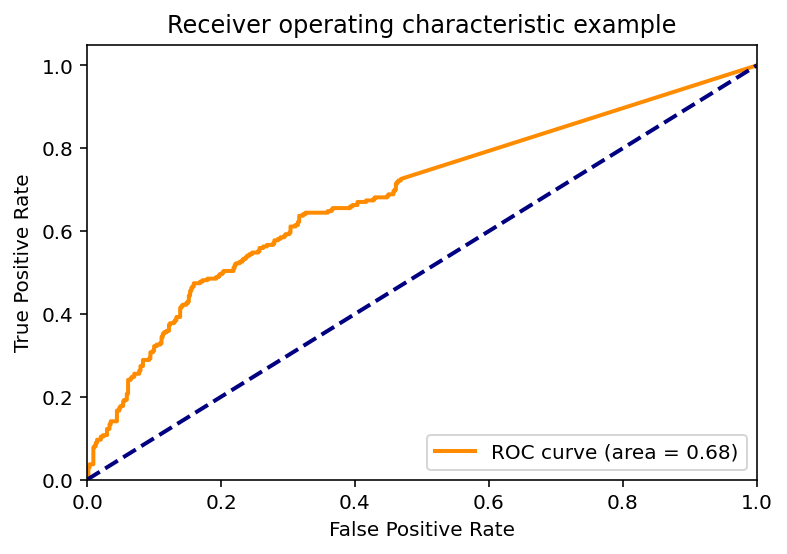

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


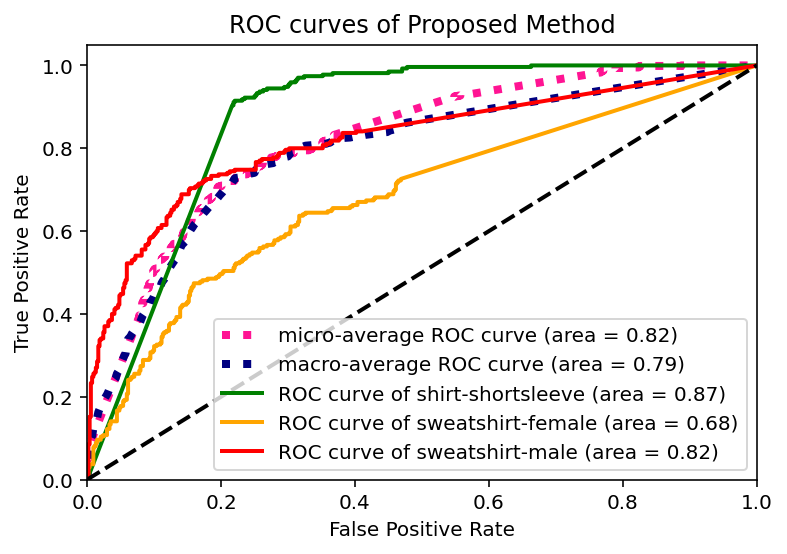

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

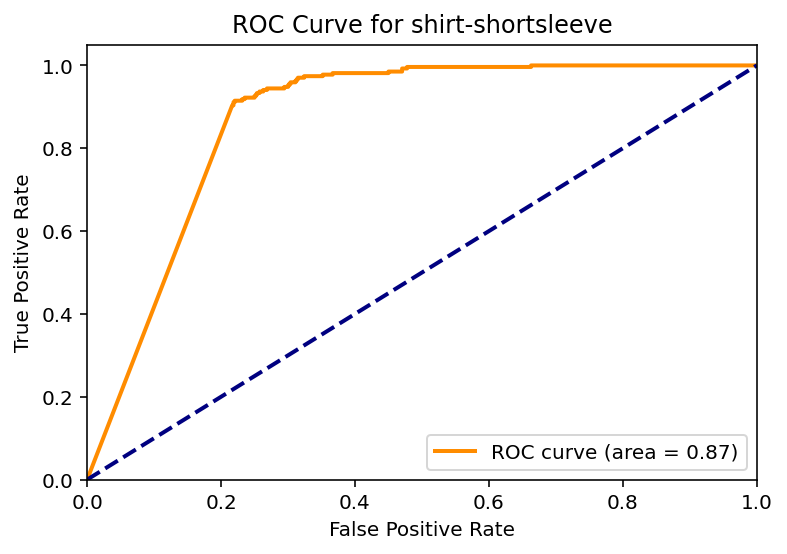

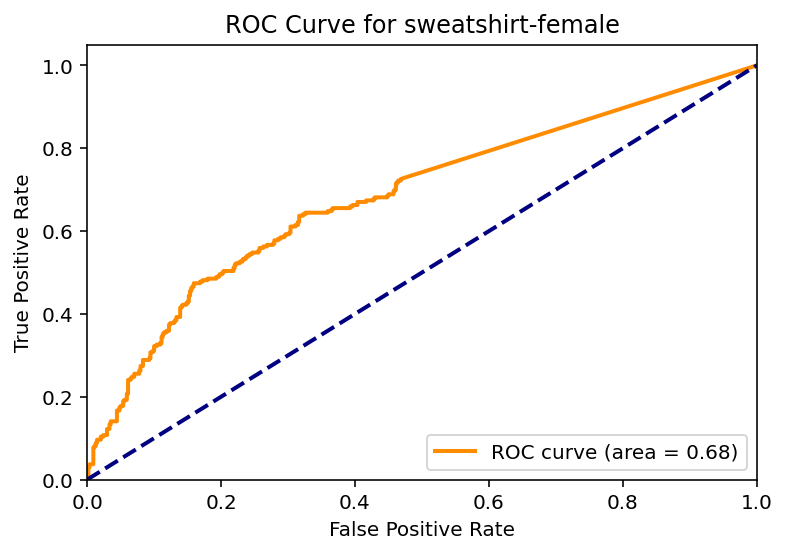

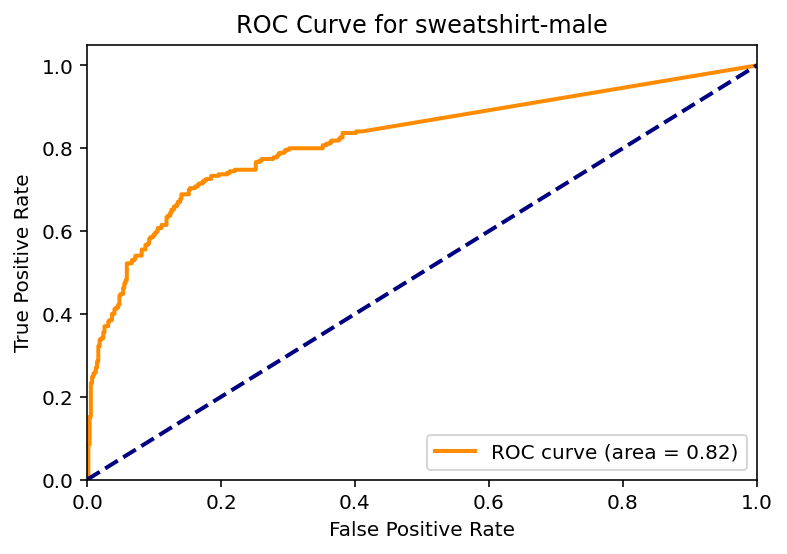

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
pred_class

tensor([0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2,
        0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1,

In [ ]:
class_counts = np.unique(pred_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([375, 134, 301], dtype=int64))

In [ ]:
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[248  18   4]
 [ 83  87 100]
 [ 44  29 197]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


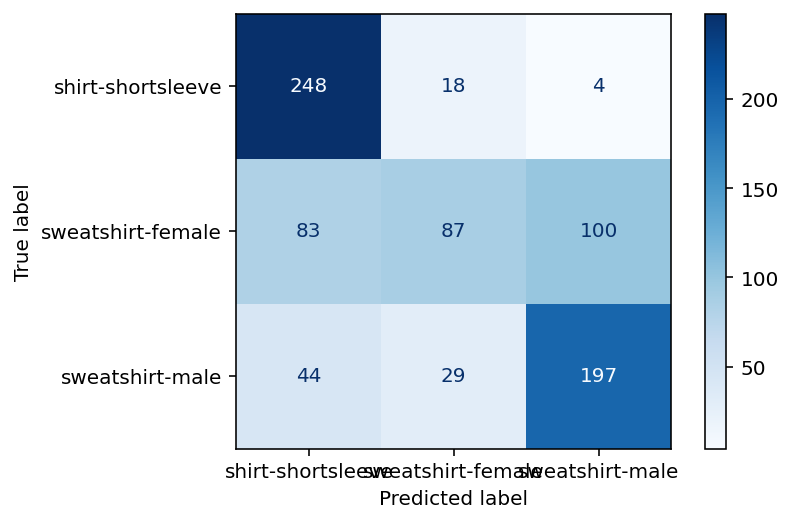

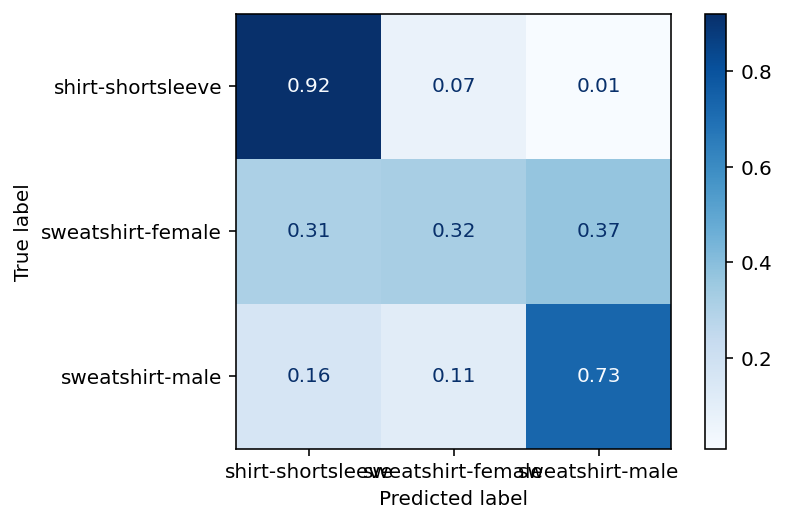

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
checker = pd.read_csv('predictions/VGG/prediction_VGG-lr-5.csv')
checker.sample(30)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

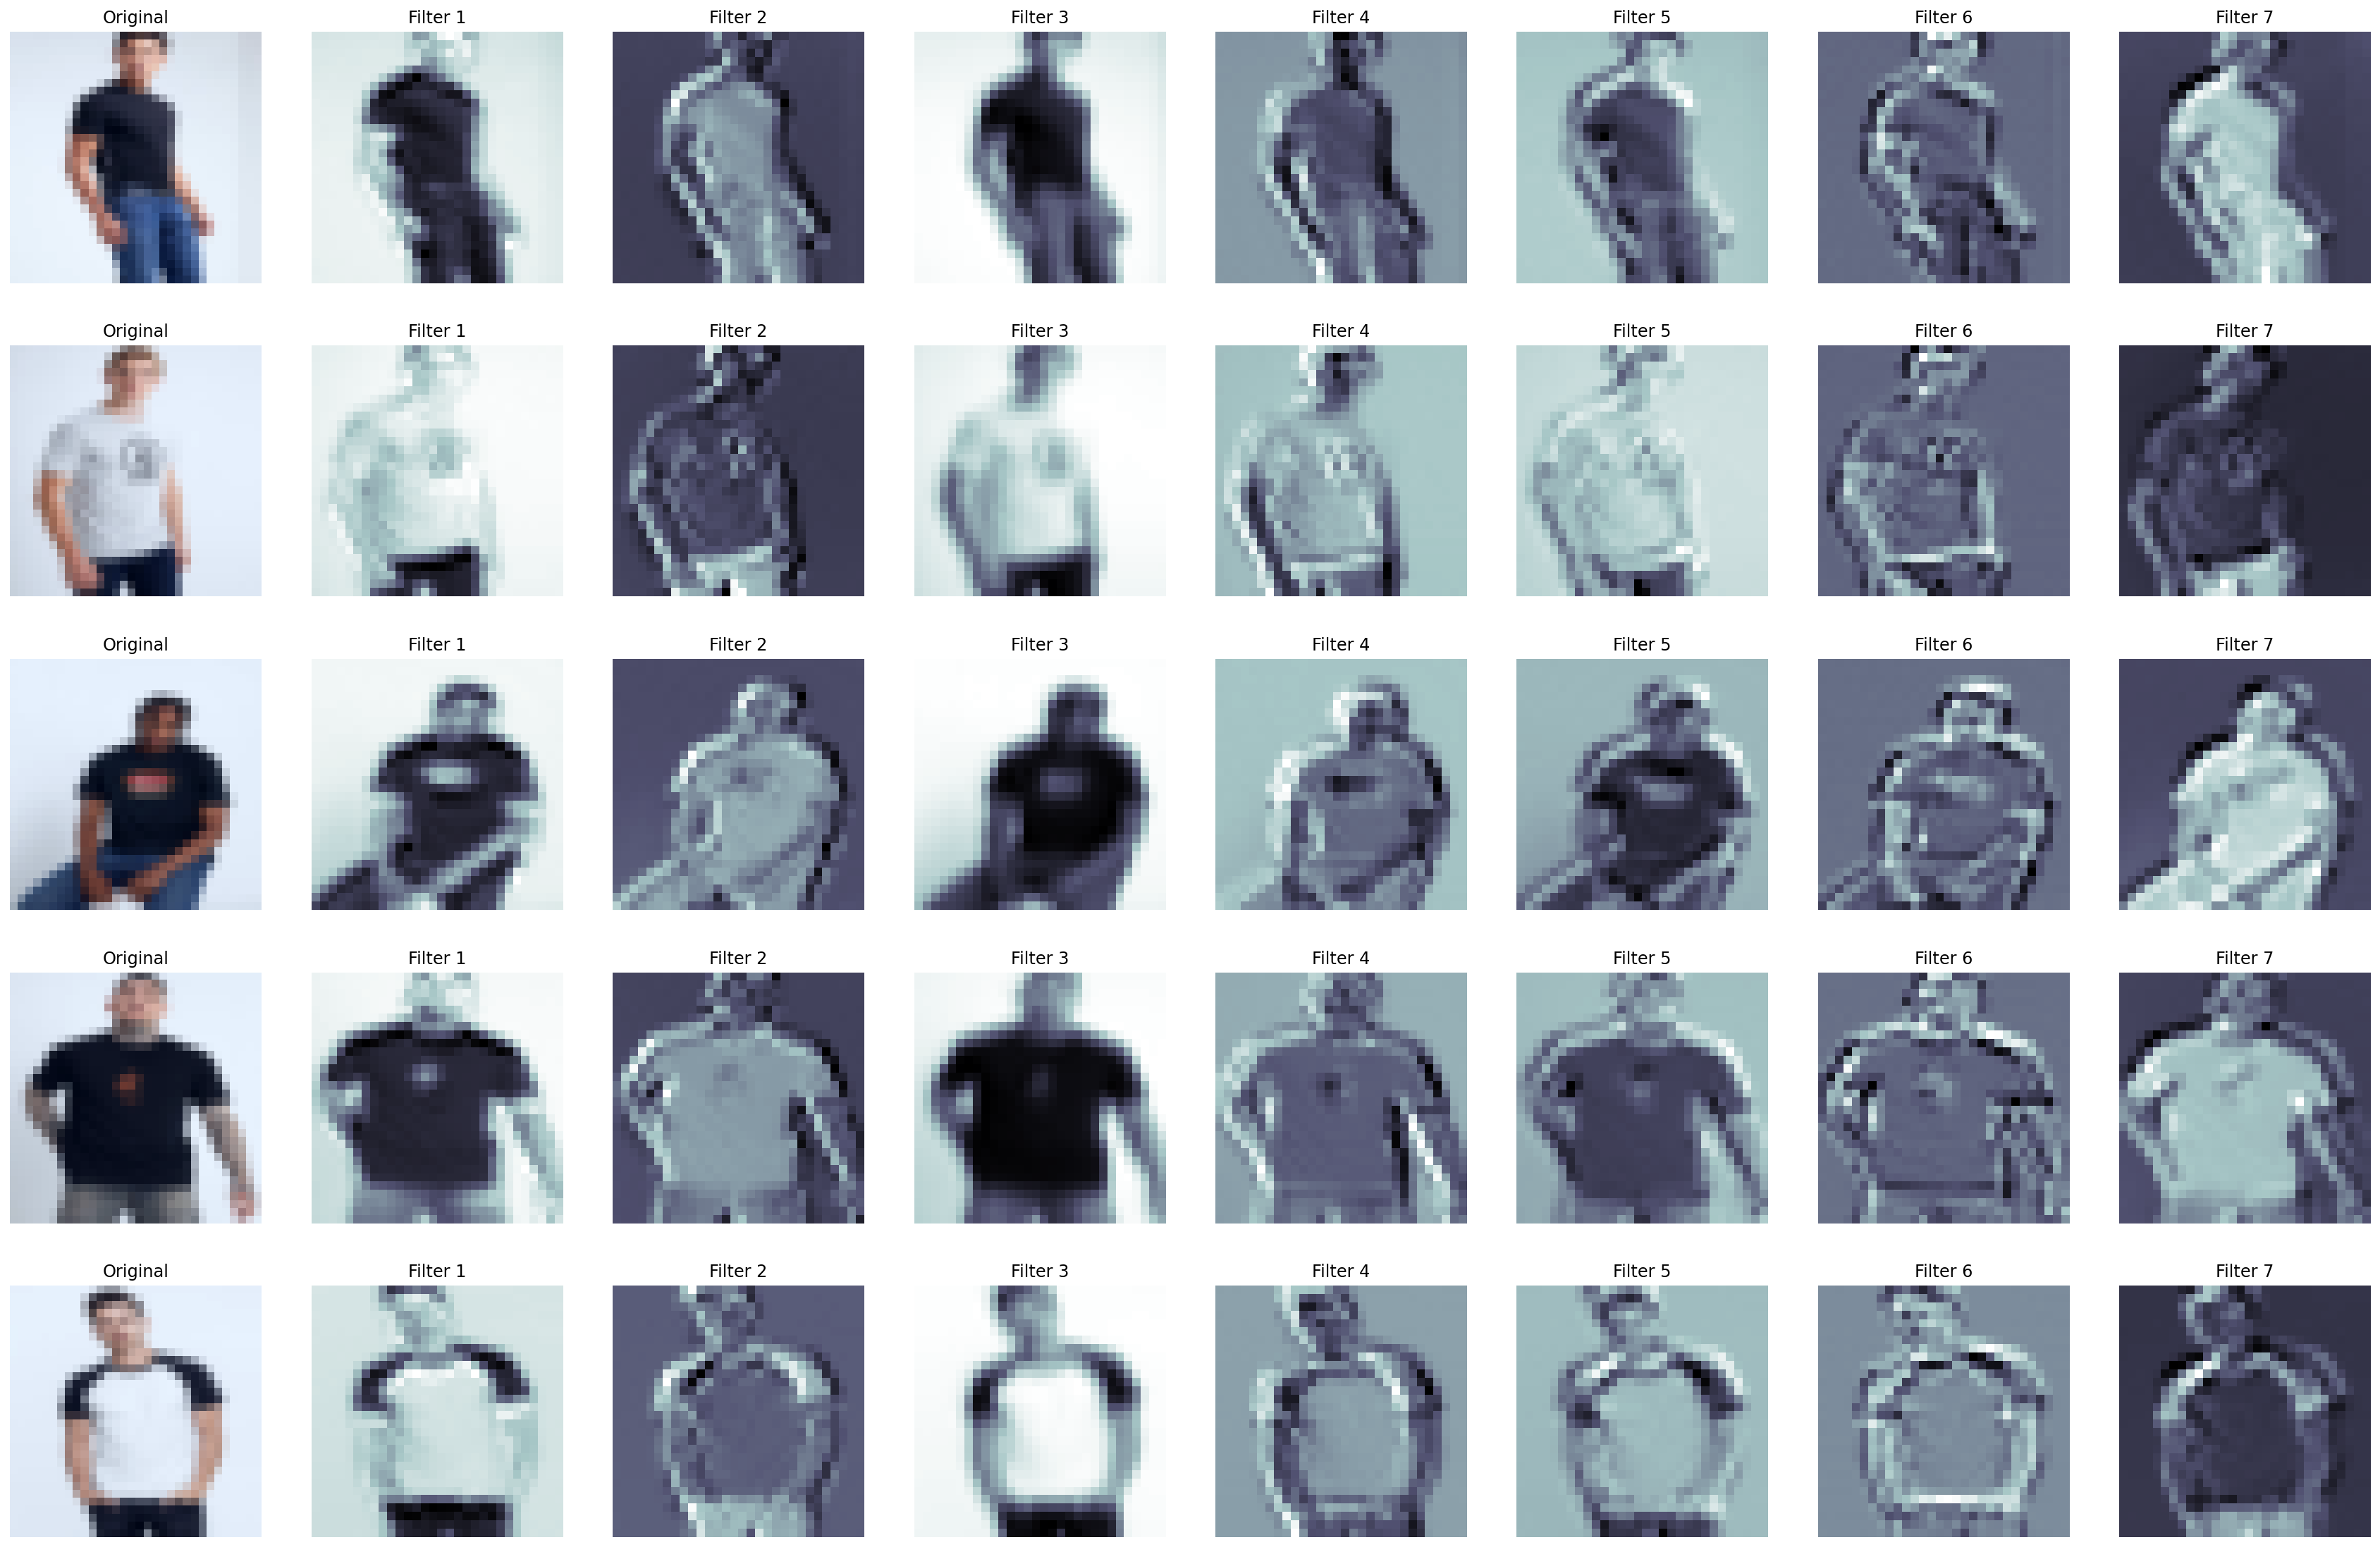

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

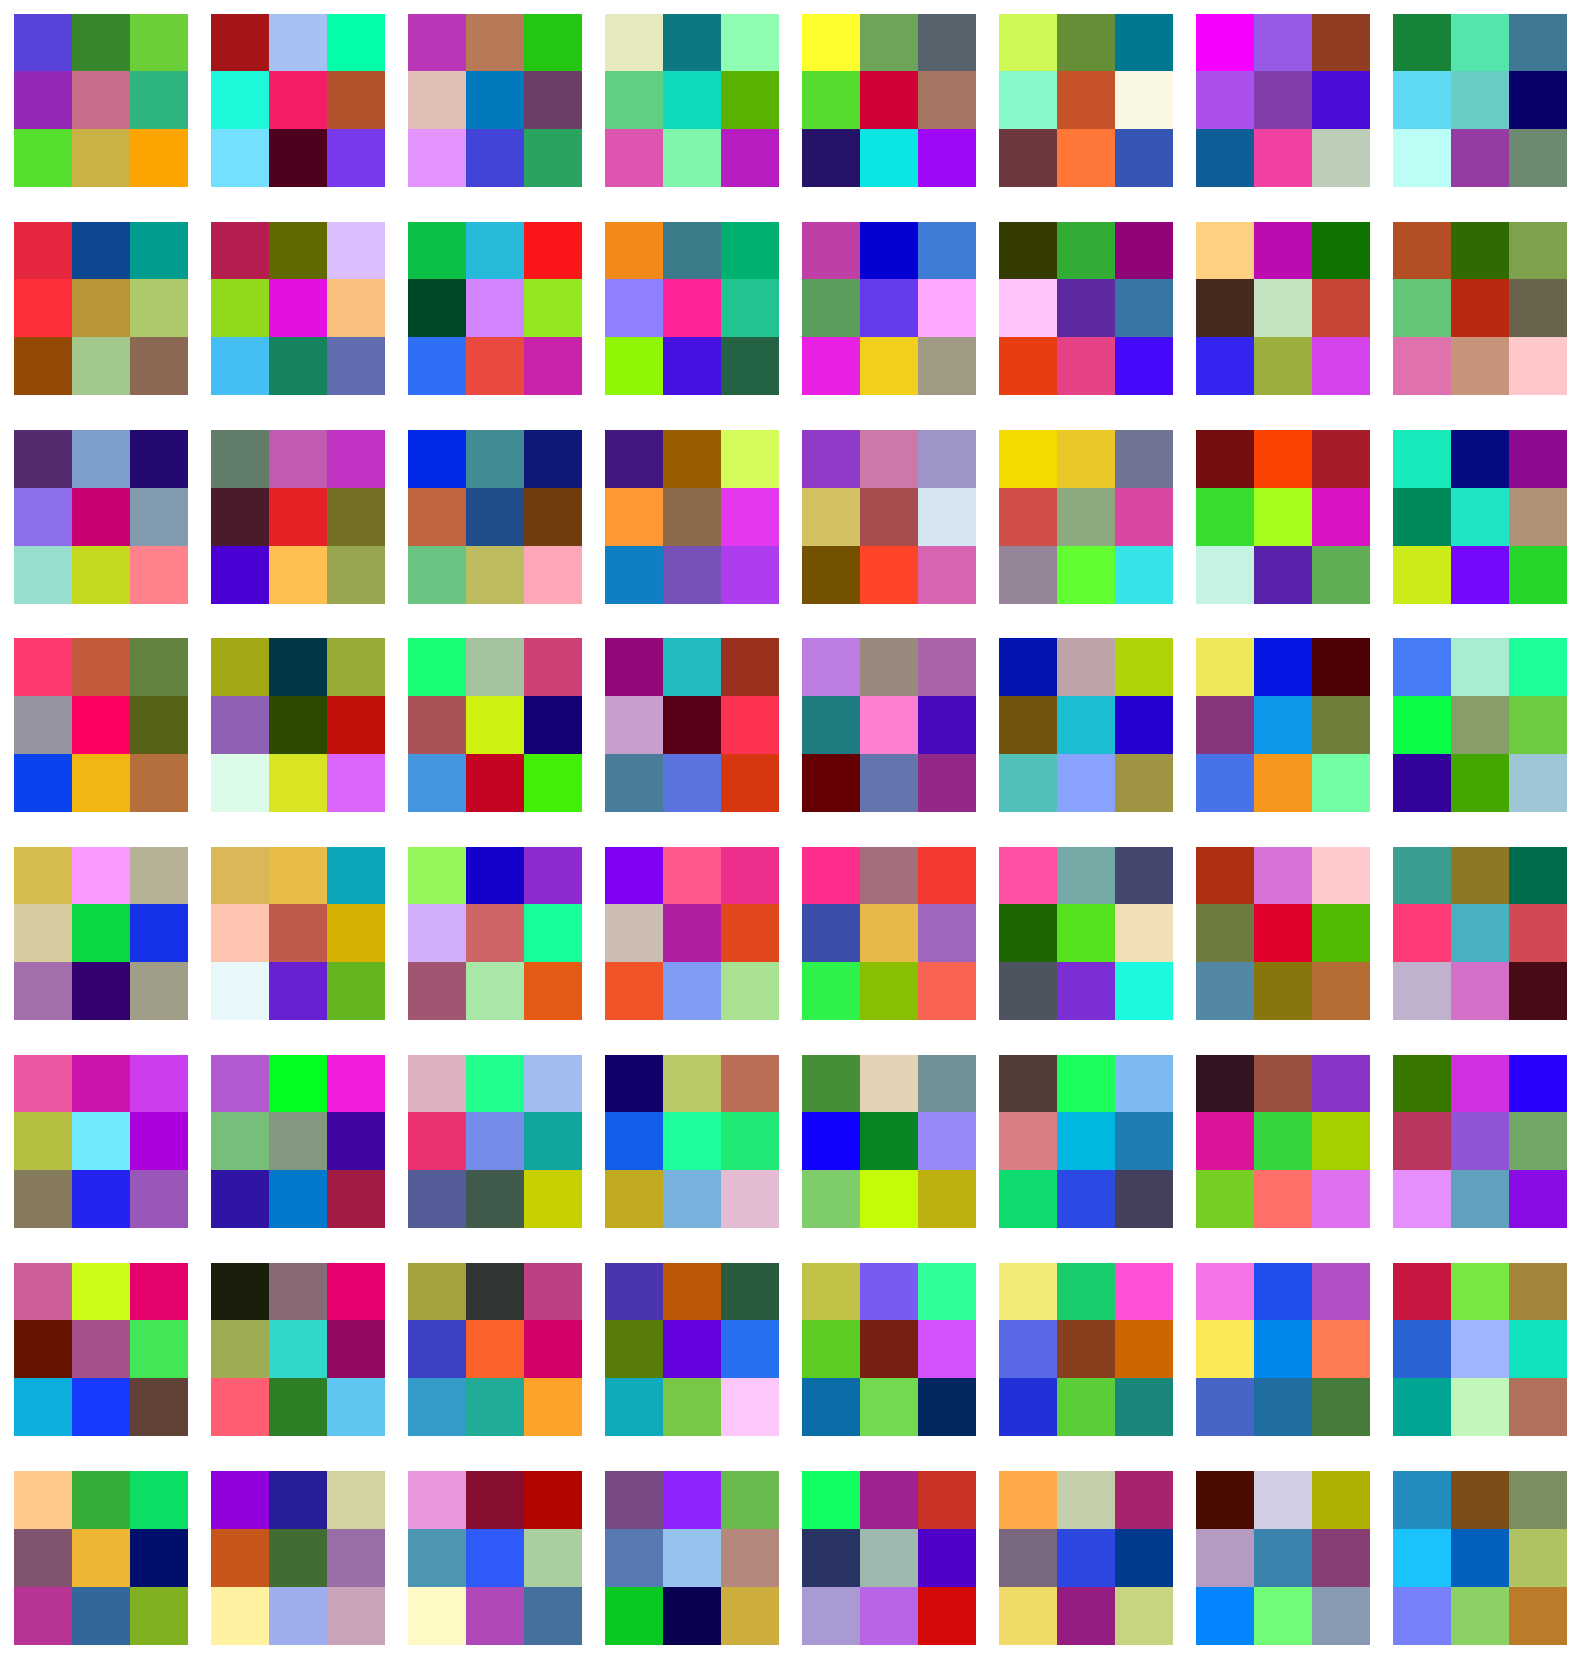

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.66      0.92      0.77       270
sweatshirt-female       0.65      0.32      0.43       270
  sweatshirt-male       0.65      0.73      0.69       270

         accuracy                           0.66       810
        macro avg       0.66      0.66      0.63       810
     weighted avg       0.66      0.66      0.63       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.6567901234567901


# VGG-11 SGD Learning rate 1e-3

In [ ]:
vgg11_layers = get_vgg_layers(vgg11_config, batch_norm=True)
#print(vgg11_layers)

OUTPUT_DIM = 3

model = VGG(vgg11_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg11_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

C:\Users\22544561\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\22544561\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 128,784,131 trainable parameters


Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

optimizer = optim.SGD(model.parameters(), lr=FOUND_LR)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
EPOCHS = 25 # You may need to run longer to get better results. Lab example is for demo only

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs = []
valid_accs = []

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-VGGSGD_model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 21s
	Train Loss: 1.083 | Train Acc: 39.17%
	 Val. Loss: 1.013 |  Val. Acc: 58.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 22s
	Train Loss: 0.955 | Train Acc: 57.63%
	 Val. Loss: 0.831 |  Val. Acc: 71.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 22s
	Train Loss: 0.715 | Train Acc: 72.54%
	 Val. Loss: 0.582 |  Val. Acc: 77.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 22s
	Train Loss: 0.488 | Train Acc: 82.17%
	 Val. Loss: 0.454 |  Val. Acc: 81.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 22s
	Train Loss: 0.331 | Train Acc: 88.83%
	 Val. Loss: 0.375 |  Val. Acc: 85.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 23s
	Train Loss: 0.225 | Train Acc: 93.00%
	 Val. Loss: 0.364 |  Val. Acc: 86.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 23s
	Train Loss: 0.163 | Train Acc: 95.46%
	 Val. Loss: 0.358 |  Val. Acc: 84.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 21s
	Train Loss: 0.113 | Train Acc: 96.79%
	 Val. Loss: 0.356 |  Val. Acc: 87.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 22s
	Train Loss: 0.062 | Train Acc: 98.79%
	 Val. Loss: 0.361 |  Val. Acc: 86.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 25s
	Train Loss: 0.041 | Train Acc: 99.42%
	 Val. Loss: 0.381 |  Val. Acc: 85.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 31s
	Train Loss: 0.031 | Train Acc: 99.62%
	 Val. Loss: 0.369 |  Val. Acc: 86.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 30s
	Train Loss: 0.026 | Train Acc: 99.54%
	 Val. Loss: 0.457 |  Val. Acc: 84.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 31s
	Train Loss: 0.017 | Train Acc: 99.92%
	 Val. Loss: 0.411 |  Val. Acc: 86.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 30s
	Train Loss: 0.017 | Train Acc: 99.79%
	 Val. Loss: 0.392 |  Val. Acc: 87.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 29s
	Train Loss: 0.011 | Train Acc: 99.92%
	 Val. Loss: 0.394 |  Val. Acc: 87.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 29s
	Train Loss: 0.009 | Train Acc: 99.92%
	 Val. Loss: 0.415 |  Val. Acc: 85.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 30s
	Train Loss: 0.008 | Train Acc: 100.00%
	 Val. Loss: 0.414 |  Val. Acc: 86.38%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 30s
	Train Loss: 0.008 | Train Acc: 99.96%
	 Val. Loss: 0.417 |  Val. Acc: 87.12%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 30s
	Train Loss: 0.007 | Train Acc: 99.92%
	 Val. Loss: 0.417 |  Val. Acc: 87.50%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 30s
	Train Loss: 0.007 | Train Acc: 99.96%
	 Val. Loss: 0.424 |  Val. Acc: 86.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 30s
	Train Loss: 0.005 | Train Acc: 100.00%
	 Val. Loss: 0.415 |  Val. Acc: 86.88%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 30s
	Train Loss: 0.007 | Train Acc: 99.92%
	 Val. Loss: 0.615 |  Val. Acc: 82.75%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 30s
	Train Loss: 0.006 | Train Acc: 99.88%
	 Val. Loss: 0.439 |  Val. Acc: 86.25%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 30s
	Train Loss: 0.004 | Train Acc: 99.92%
	 Val. Loss: 0.414 |  Val. Acc: 86.62%


Training:   0%|          | 0/75 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 31s
	Train Loss: 0.004 | Train Acc: 100.00%
	 Val. Loss: 0.419 |  Val. Acc: 86.88%


#### Losses and Accuracy VGG lr 1e-3 plots.

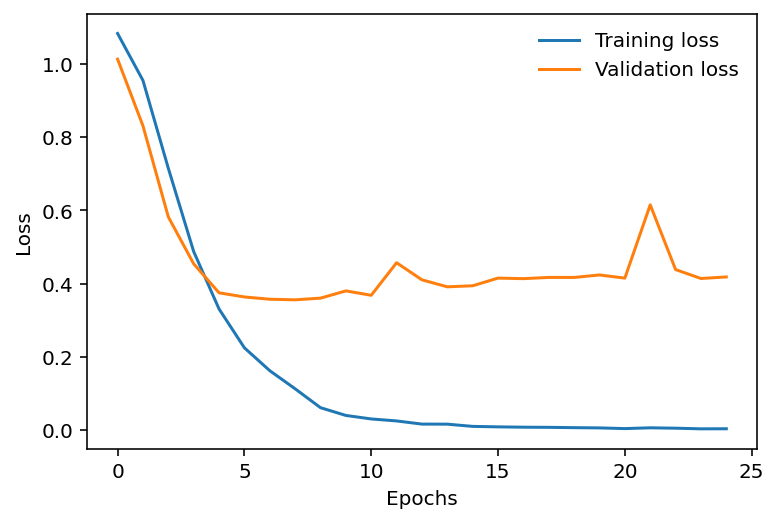

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

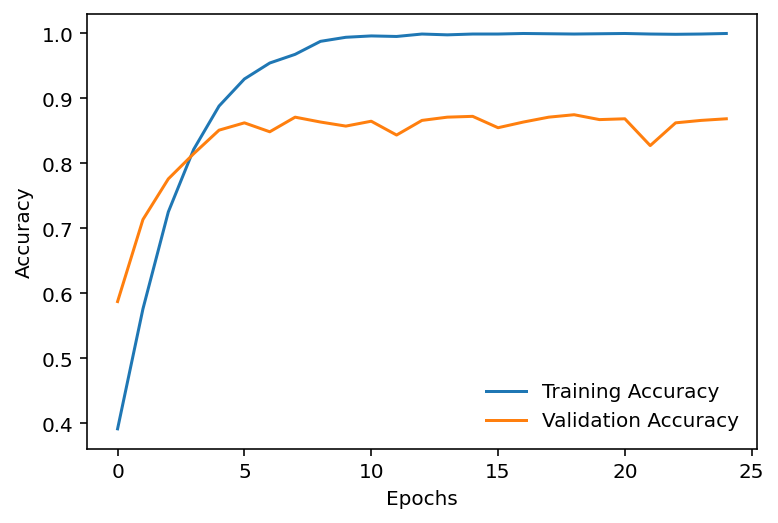

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs, label='Training Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(frameon=False)

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-VGGSGD_model.pt'))

<All keys matched successfully>

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_VGGSGD.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_VGGSGD.csv')
predicted_csv.sample(20)

,id,shirt-shortsleeve,sweatshirt-female,sweatshirt-male
725,sweatshirt-male (604),0.006792,0.016160,0.977048
258,shirt-shortsleeve (945),0.991160,0.001128,0.007712
25,shirt-shortsleeve (1097),0.999256,0.000311,0.000432
43,shirt-shortsleeve (1162),0.945466,0.010152,0.044382
306,sweatshirt-female (1214),0.000103,0.994982,0.004915
398,sweatshirt-female (202),0.014362,0.851013,0.134625
420,sweatshirt-female (2225),0.000615,0.812890,0.186495
171,shirt-shortsleeve (563),0.983572,0.000903,0.015525
426,sweatshirt-female (2260),0.002079,0.883649,0.114272
739,sweatshirt-male (685),0.614002,0.022181,0.363817


In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

Index(['id', 'shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male'], dtype='object')

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

In [ ]:
Ground_truth.to_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

810

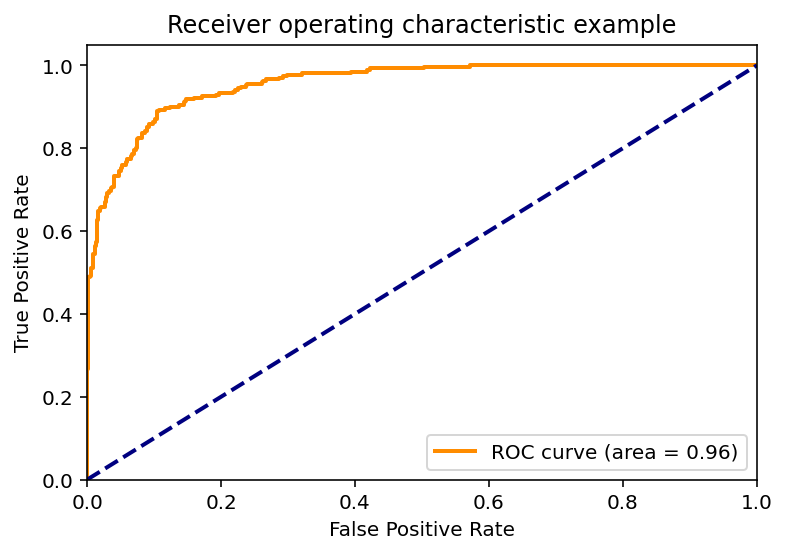

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


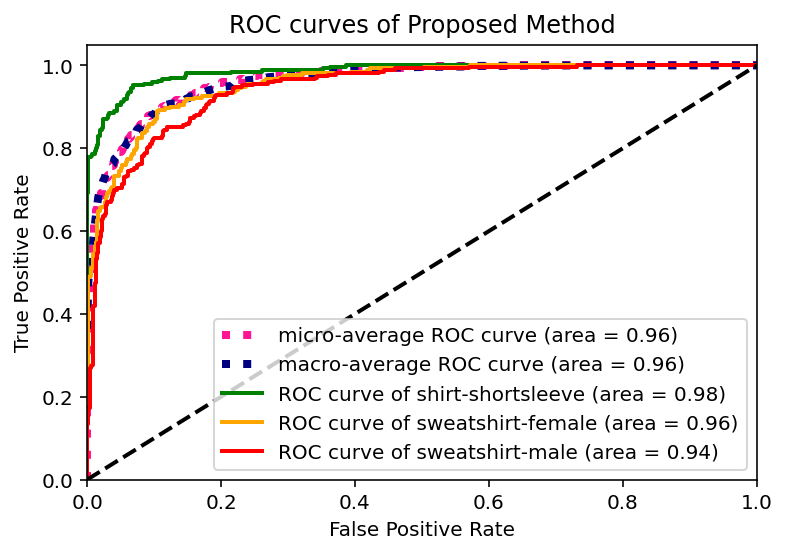

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

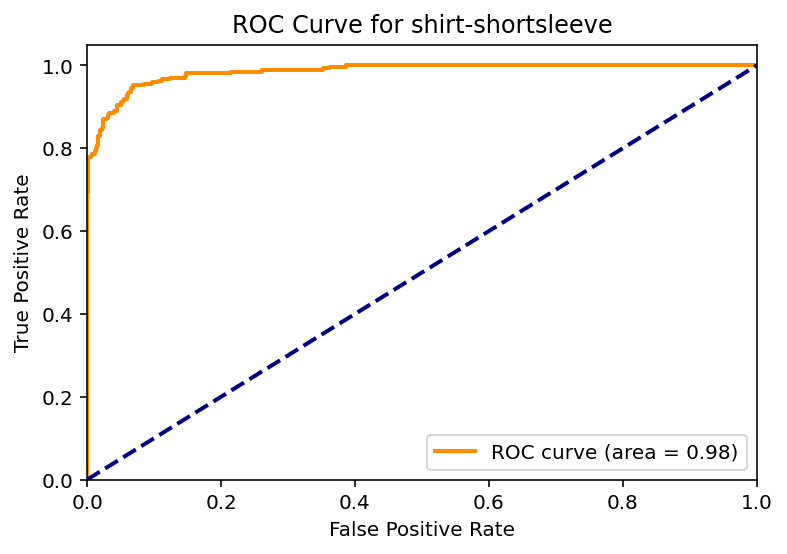

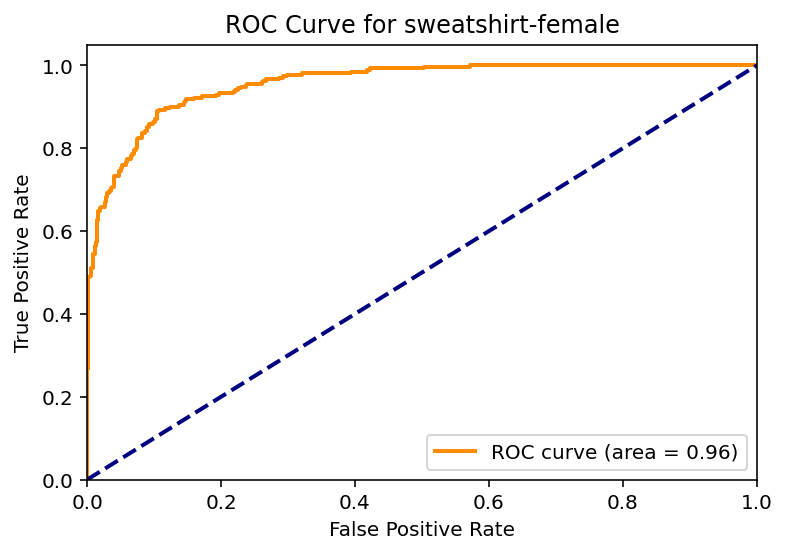

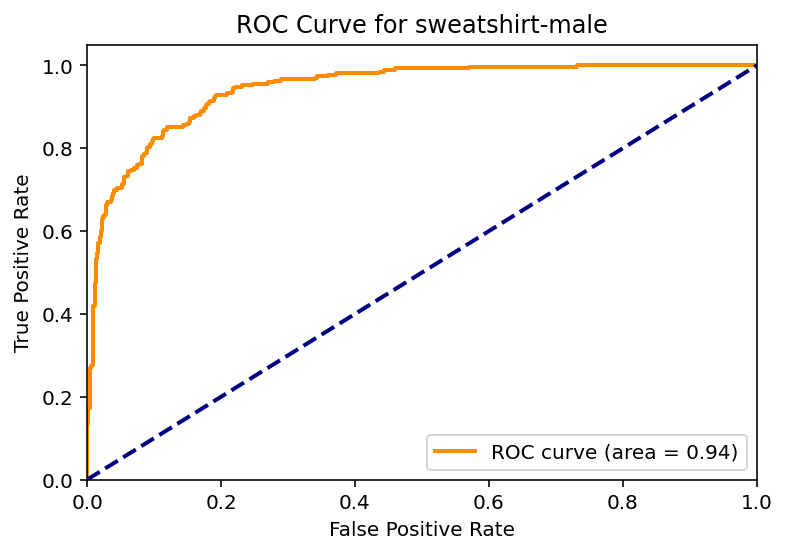

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
pred_class

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
class_counts = np.unique(pred_class, return_counts=True)
class_counts

(array([0, 1, 2], dtype=int64), array([268, 292, 250], dtype=int64))

In [ ]:
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

(array([0, 1, 2], dtype=int64), array([270, 270, 270], dtype=int64))

[[242  12  16]
 [  5 237  28]
 [ 21  43 206]]
['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
[270 270 270]
[[270. 270. 270.]
 [270. 270. 270.]
 [270. 270. 270.]]


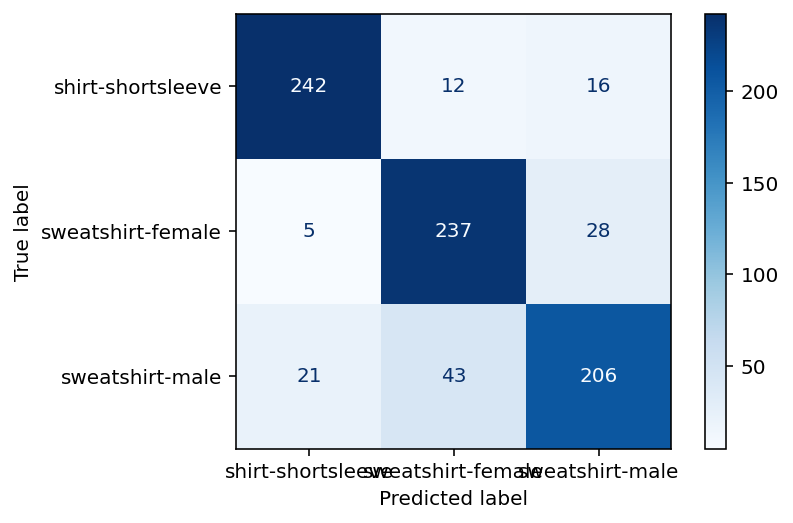

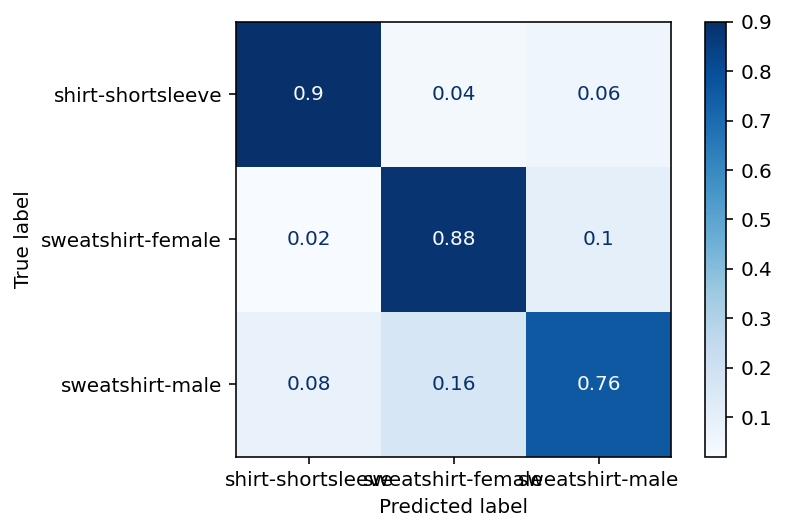

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
checker = pd.read_csv('predictions/VGG/prediction_VGG-lr-3.csv')
checker.sample(30)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

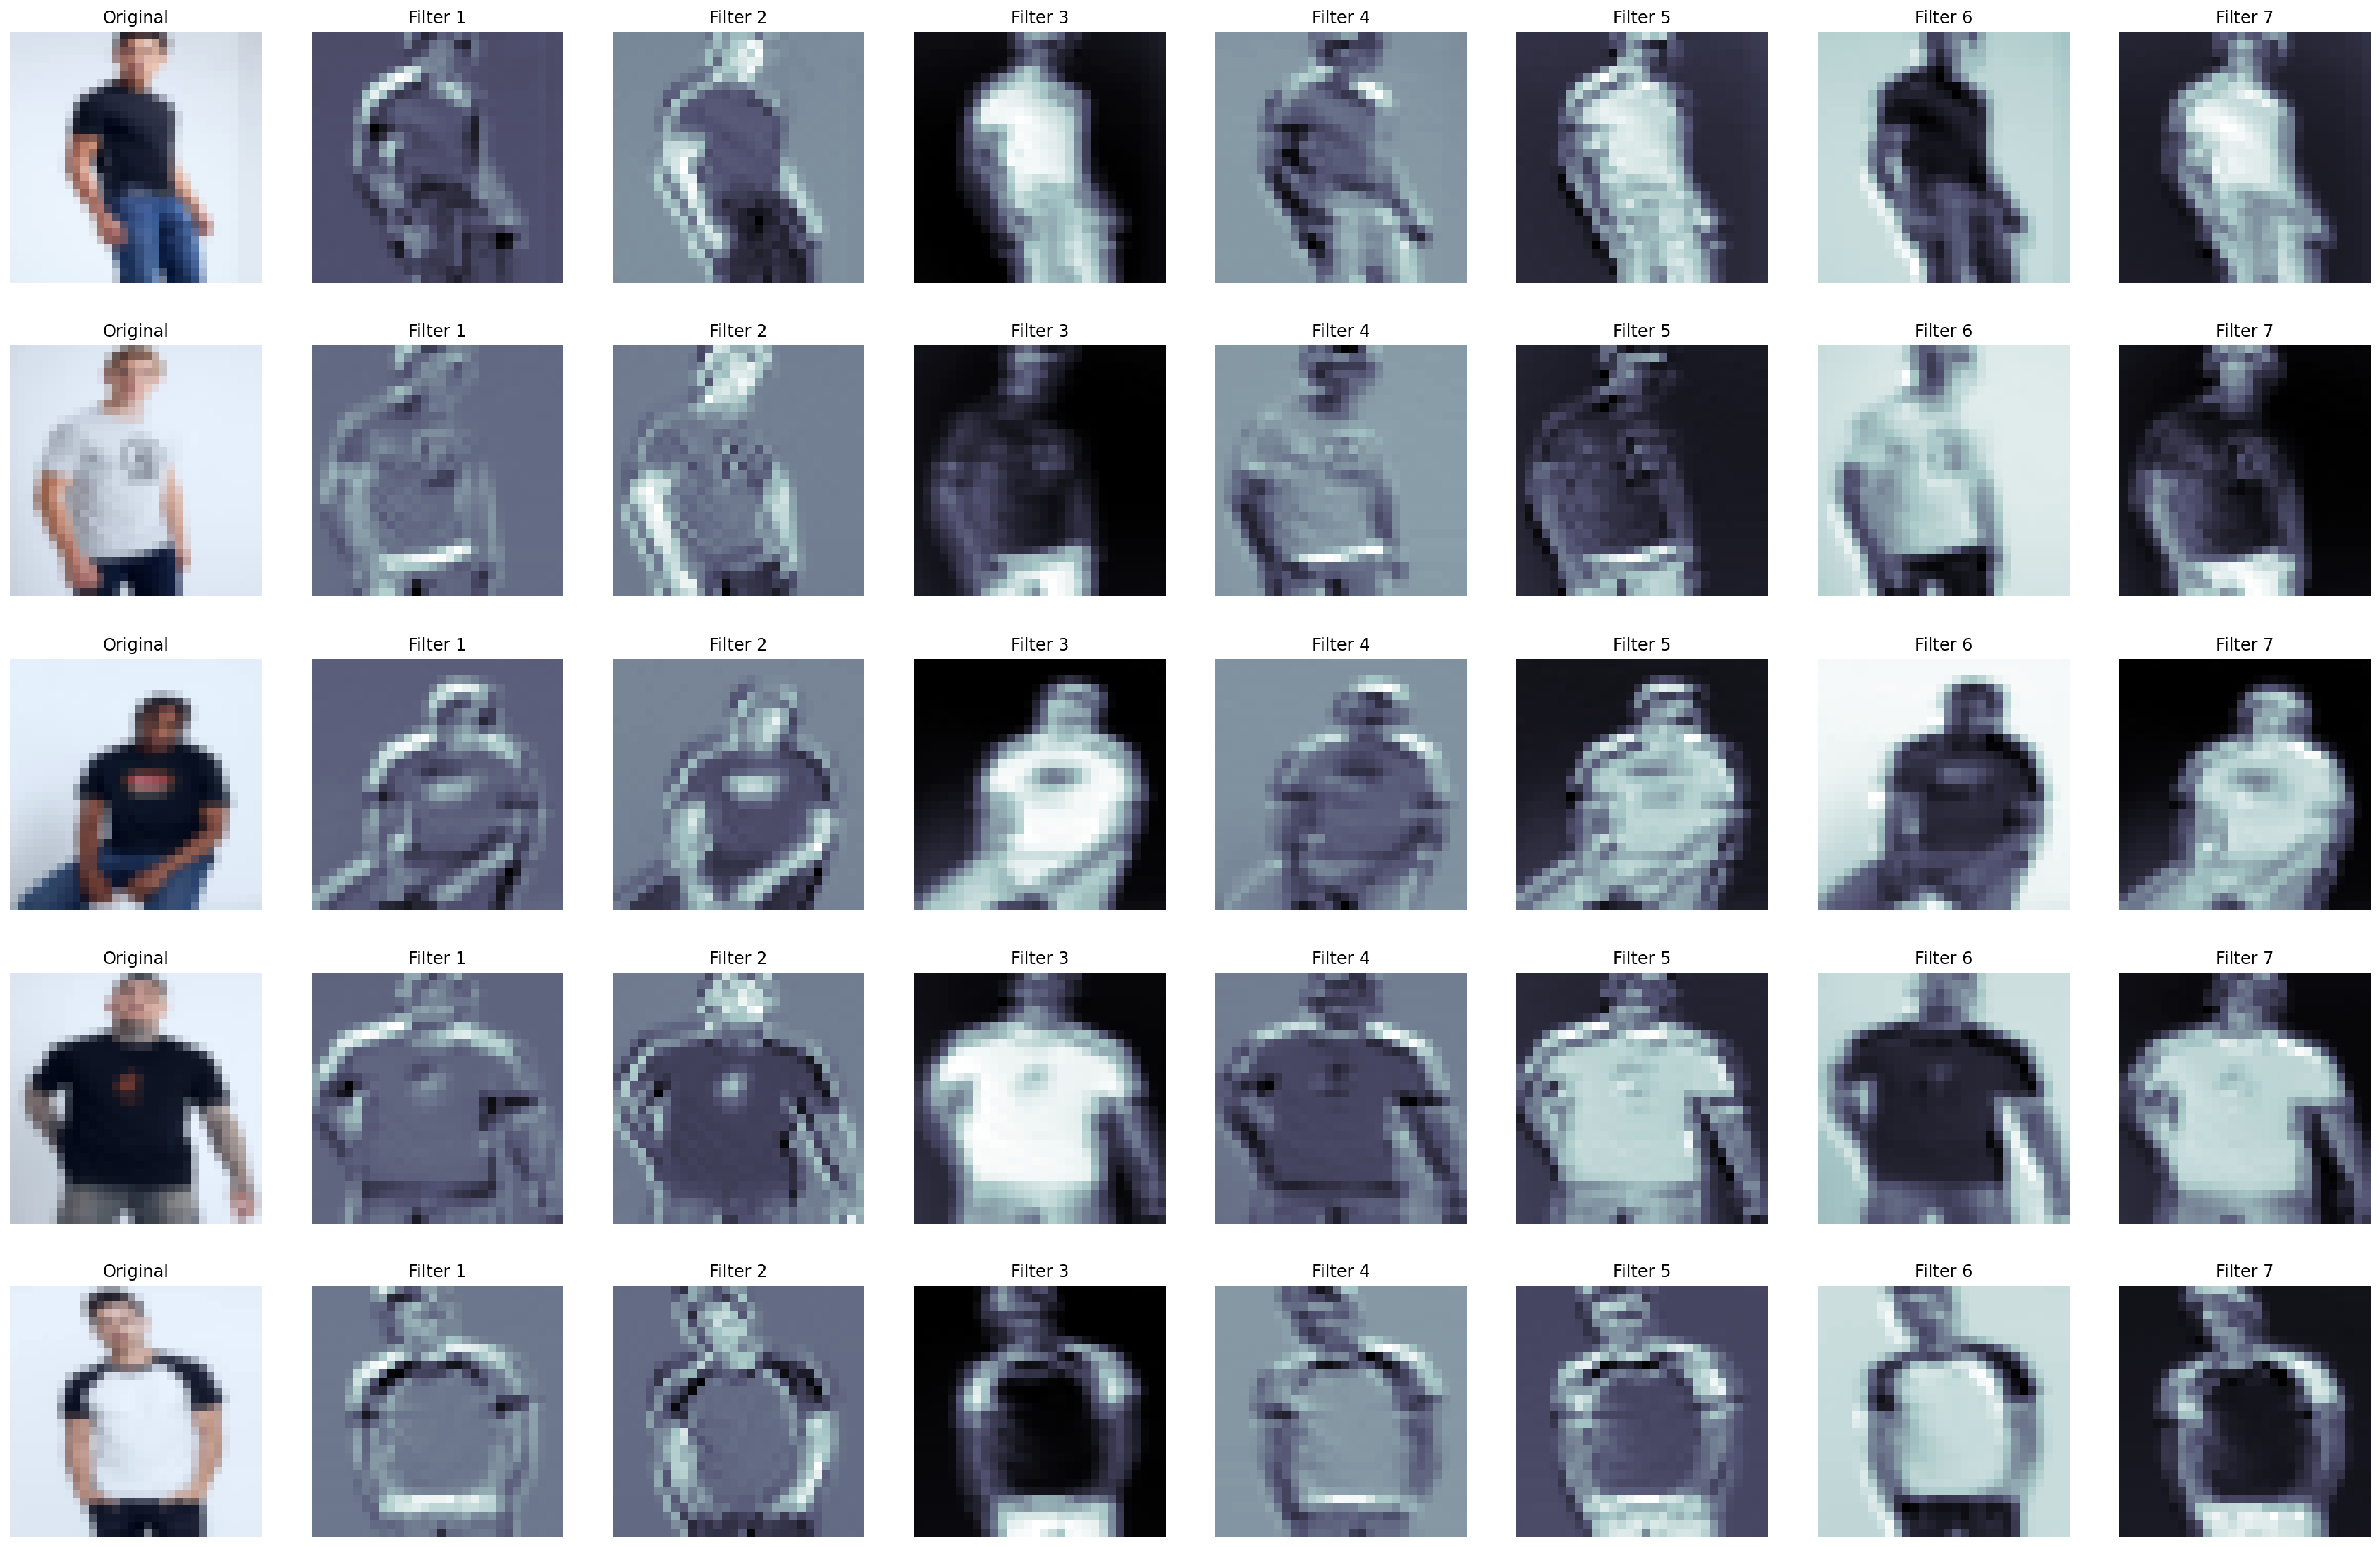

In [ ]:
N_IMAGES = 5
N_FILTERS = 7

images = [image for image, label in [test_ds[i] for i in range(N_IMAGES)]]
filters = model.features[0].weight.data

plot_filtered_images(images, filters, N_FILTERS)

In [ ]:
def plot_filters(filters, normalize = True):

    filters = filters.cpu()

    n_filters = filters.shape[0]

    rows = int(np.sqrt(n_filters))
    cols = int(np.sqrt(n_filters))

    fig = plt.figure(figsize = (30, 15))

    for i in range(rows*cols):

        image = filters[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(image.permute(1, 2, 0))
        ax.axis('off')

    fig.subplots_adjust(wspace = -0.9)

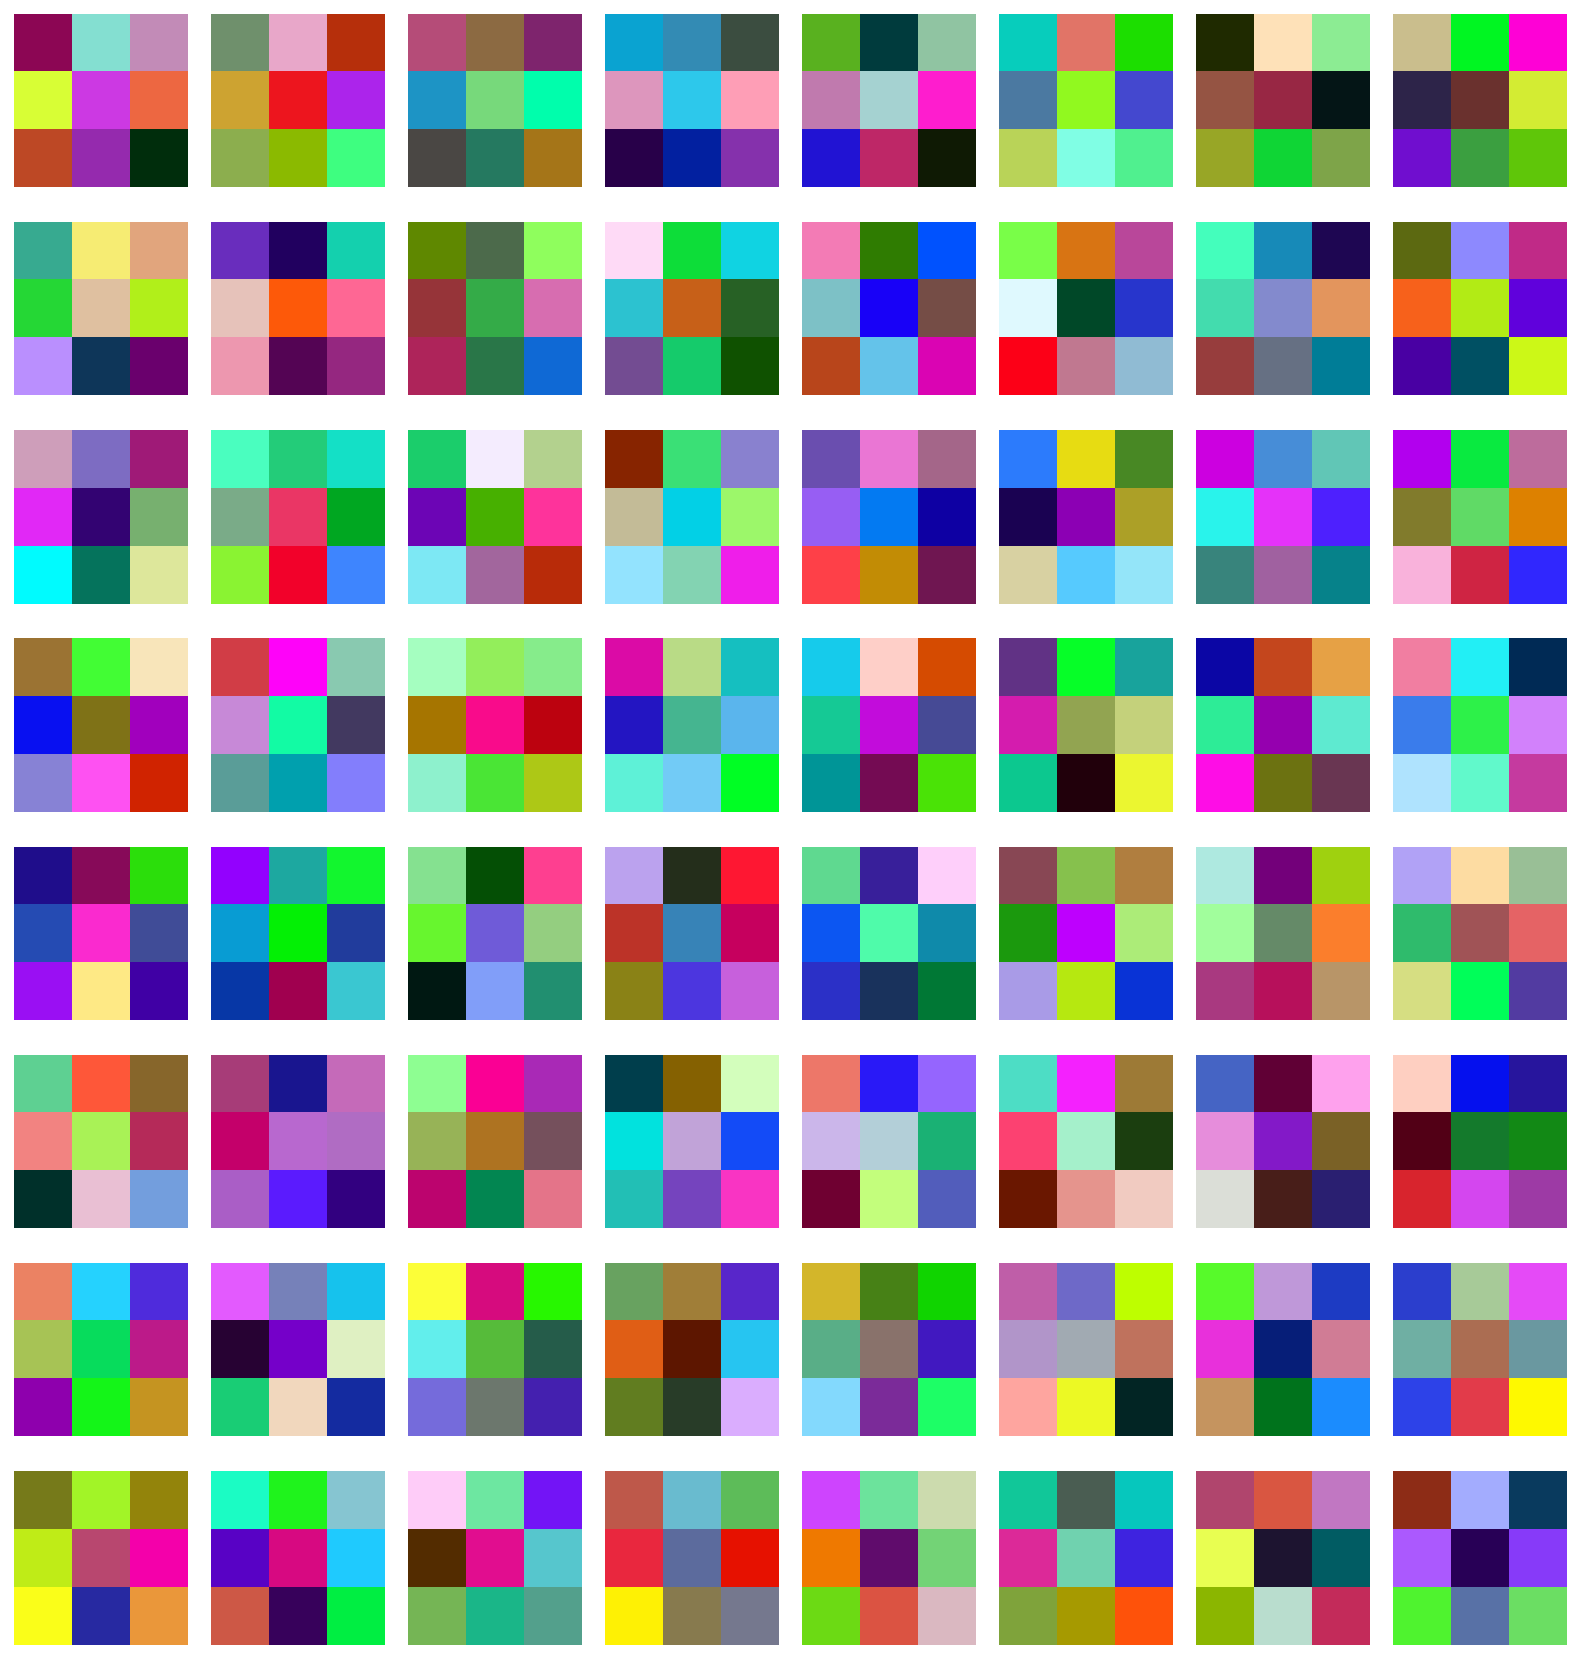

In [ ]:
plot_filters(filters)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

shirt-shortsleeve       0.90      0.90      0.90       270
sweatshirt-female       0.81      0.88      0.84       270
  sweatshirt-male       0.82      0.76      0.79       270

         accuracy                           0.85       810
        macro avg       0.85      0.85      0.85       810
     weighted avg       0.85      0.85      0.85       810



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

0.845679012345679


# ResNet ADAM 1e-3

In [ ]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()

        block, n_blocks, channels = config
        self.in_channels = channels[0]

        assert len(n_blocks) == len(channels) == 4

        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)

    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):

        layers = []

        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False

        layers.append(block(self.in_channels, channels, stride, downsample))

        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels

        return nn.Sequential(*layers)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)

        return x, h

class BasicBlock(nn.Module):

    expansion = 1

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):

    expansion = 4

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])

In [ ]:
pretrained_model = models.resnet152(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features
OUTPUT_DIM = 3

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
model = ResNet(resnet152_config, OUTPUT_DIM)
model.load_state_dict(pretrained_model.state_dict())

C:\Users\22544561\AppData\Roaming\Python\Python37\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to C:\Users\22544561/.cache\torch\hub\checkpoints\resnet152-394f9c45.pth
10.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

27.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to 

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 58,149,955 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]

optimizer = optim.Adam(params, lr = FOUND_LR)

In [ ]:
EPOCHS = 25
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

print(MAX_LRS)

[0.0001, 0.0001, 0.000125, 0.00016666666666666666, 0.00025, 0.0005, 0.001]


In [ ]:
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
def train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs_1 = []
valid_accs_1 = []

train_accs_5 = []
valid_accs_5 = []

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model,valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs_1.append(train_acc_1)
    valid_accs_1.append(valid_acc_1)
    train_accs_5.append(train_acc_5)
    valid_accs_5.append(valid_acc_5)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-RESNETADAM_model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% |'\
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% |'\
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

Epoch: 01 | Epoch Time: 1m 58s
	Train Loss: 0.973 | Train Acc @1:  54.33% |Train Acc @5:  81.54%
	Valid Loss: 1.599 | Valid Acc @1:  62.25% |Valid Acc @5:  87.88%
Epoch: 02 | Epoch Time: 1m 55s
	Train Loss: 0.599 | Train Acc @1:  75.75% |Train Acc @5:  93.12%
	Valid Loss: 1.017 | Valid Acc @1:  76.12% |Valid Acc @5:  93.50%


In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

#### Losses and Accuracy ResNet lr 1e-3 plots.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_1, label='Training Accuracy_1')
plt.plot(valid_accs_1, label='Validation Accuracy_1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_1")
plt.legend(frameon=False)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_5, label='Training Accuracy_5')
plt.plot(valid_accs_5, label='Validation Accuracy_5')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_5")
plt.legend(frameon=False)

Loading the best model

In [ ]:
model.load_state_dict(torch.load('C:/Users/22544561/OneDrive - MMU/success/Dataset/best-models/best-RESNETADAM_model.pt'))

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

In [ ]:
labels.unique()

In [ ]:
len(probs)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_VGGSGD.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/predictions/prediction_VGGSGD.csv')
predicted_csv.sample(20)

In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

In [ ]:
Ground_truth.to_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('C:/Users/22544561/OneDrive - MMU/success/Dataset/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
pred_class

In [ ]:
class_counts = np.unique(pred_class, return_counts=True)
class_counts

In [ ]:
true_class

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
# checker = pd.read_csv('predictions/ResNet/prediction_resNET-lr-3.csv')
# checker.sample(30)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

# ResNet MODEL Learning rate 1e-2

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-2

params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]

optimizer = optim.Adam(params, lr = FOUND_LR)

In [ ]:
EPOCHS = 25
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

print(MAX_LRS)

In [ ]:
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
def train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs_1 = []
valid_accs_1 = []

train_accs_5 = []
valid_accs_5 = []

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model,valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs_1.append(train_acc_1)
    valid_accs_1.append(valid_acc_1)
    train_accs_5.append(train_acc_5)
    valid_accs_5.append(valid_acc_5)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'best-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% |'\
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% |'\
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

#### Losses and Accuracy ResNet lr 1e-2 plots.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_1, label='Training Accuracy_1')
plt.plot(valid_accs_1, label='Validation Accuracy_1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_1")
plt.legend(frameon=False)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_5, label='Training Accuracy_5')
plt.plot(valid_accs_5, label='Validation Accuracy_5')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_5")
plt.legend(frameon=False)

Loading the best model

In [ ]:
model.load_state_dict(torch.load('best-model.pt'))

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

In [ ]:
labels.unique()

In [ ]:
len(probs)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/predictions/ResNet/prediction_resNET-lr-2.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/predictions/ResNet/prediction_resNET-lr-2.csv')
predicted_csv.sample(20)

In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

In [ ]:
Ground_truth.to_csv('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/ground_truth/Ground_Truth.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
pred_class

In [ ]:
class_counts = np.unique(pred_class, return_counts=True)
class_counts

In [ ]:
true_class

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
checker = pd.read_csv('predictions/ResNet/prediction_resNET-lr-2.csv')
checker.sample(30)

In [ ]:
def plot_filtered_images(images, filters, n_filters=None, normalize=True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize=(30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1, 2, 0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap='bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off')

    fig.subplots_adjust(hspace=-0.7)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)

# ResNet MODEL Learning rate 1e-5

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-5

params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]

optimizer = optim.Adam(params, lr = FOUND_LR)

In [ ]:
EPOCHS = 25
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

print(MAX_LRS)

In [ ]:
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
def train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

# keeping-track-of-losses
train_losses = []
valid_losses = []

# keeping-track-of-accuracy
train_accs_1 = []
valid_accs_1 = []

train_accs_5 = []
valid_accs_5 = []

best_valid_loss = float('inf')

for epoch in range(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model,valid_iter, criterion, device)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    train_accs_1.append(train_acc_1)
    valid_accs_1.append(valid_acc_1)
    train_accs_5.append(train_acc_5)
    valid_accs_5.append(valid_acc_5)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'best-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% |'\
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% |'\
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

#### Losses and Accuracy ResNet lr 1e-5 plots.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_1, label='Training Accuracy_1')
plt.plot(valid_accs_1, label='Validation Accuracy_1')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_1")
plt.legend(frameon=False)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_accs_5, label='Training Accuracy_5')
plt.plot(valid_accs_5, label='Validation Accuracy_5')
plt.xlabel("Epochs")
plt.ylabel("Accuracy_5")
plt.legend(frameon=False)

Loading the best model

In [ ]:
model.load_state_dict(torch.load('best-model.pt'))

In [ ]:
images, labels, probs = get_predictions(model, test_iter)

In [ ]:
labels.unique()

In [ ]:
len(probs)

In [ ]:
#Predict csv
preds = []
for data, label in test_iter:
    #output = torch.nn.functional.softmax(net(data.to(devices[0])), dim=1)
    output = probs
    preds.extend(output.cpu().detach().numpy())
ids = sorted(os.listdir(
    os.path.join(data_dir, 'test','unknown')))
with open('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/predictions/ResNet/prediction_resNET-lr-5.csv', 'w') as f:
    f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
    for i, output in zip(ids, preds):
        f.write(i.split('.')[0] + ',' + ','.join(
            [str(num) for num in output]) + '\n')

In [ ]:
predicted_csv=pd.read_csv('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/predictions/ResNet/prediction_resNET-lr-5.csv')
predicted_csv.sample(20)

In [ ]:
def fill_rows_with_zero(df, target_column, match_column, match_substring):
    df[target_column] = np.where(df[match_column].str.contains(match_substring), 1, df[target_column])
    if target_column in df.columns:
        target_values = df[target_column].values
        mask = target_values == 1
        df.loc[mask, df.columns.difference([target_column, 'id'])] = 0
    df[target_column] = df[target_column].astype(int)


    return df

In [ ]:
predicted_csv.columns

In [ ]:
columns = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']
for col in columns:
    Ground_truth = fill_rows_with_zero(predicted_csv, col, 'id', col.lower())

In [ ]:
Ground_truth.sample(20)

In [ ]:
Ground_truth.to_csv('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/ground_truth/Ground_Truth.csv',
                    index=False
                   )

In [ ]:
test = pd.read_csv('/Users/brunchcode/Documents/DLP/04-05-2023/models/Full-project/ground_truth/Ground_Truth.csv')
y_test = np.array(test.drop(['id'], axis=1))
len(y_test)

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='orange', lw=lw,
         label='ROC curve of sweatshirt-female (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of sweatshirt-male (area = {1:0.2f})'
          ''.format(1, roc_auc[2]))

#plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
#          label='ROC curve of shirt-shortsleeve (area = {1:0.2f})'
#          ''.format(1, roc_auc[3]))

#plt.plot(fpr[4], tpr[4], color='yellow', lw=lw,
#          label='ROC curve of sweatshirt-male (area = {1:0.2f})'
#         ''.format(1, roc_auc[4]))

#plt.plot(fpr[5], tpr[5], color='brown', lw=lw,
#          label='ROC curve of sweatshirt-female (area = {1:0.2f})'
#          ''.format(1, roc_auc[5]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

class_names = ['shirt-shortsleeve', 'sweatshirt-female', 'sweatshirt-male']

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for %s' % class_names[i])
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

In [ ]:
pred_class

In [ ]:
class_counts = np.unique(pred_class, return_counts=True)
class_counts

In [ ]:
true_class

In [ ]:
class_counts2 = np.unique(true_class, return_counts=True)
class_counts2

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
#class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)


C = cm
divisor = np.zeros((3,3))
divisor[0][:] = 270
divisor[1][:] = 270
divisor[2][:] = 270
#divisor[3][:] = 270
#divisor[4][:] = 270
#divisor[5][:] = 270

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

why does the shortsleeves being predicted well, is it because of how diffrent shortsleeves?

In [ ]:
checker = pd.read_csv('predictions/ResNet/prediction_resNET-lr-5.csv')
checker.sample(30)

In [ ]:
y_true = np.argmax(y_test, axis=1)  # true class labels
y_pred = np.argmax(probs, axis=1)   # predicted class labels

In [ ]:
from sklearn.metrics import classification_report

# y_true is the true labels for the test set
# y_pred is the predicted labels for the test set
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy)